# Space missions data understanding, visualization and analysis

Who does not love Space?
This DataSet includes all the space missions since the beginning of Space Race (1957)


## Introduction

Ever since the start of world war when the USSR launched the first ever manmade sattelite into the space called the Sputnik, the world has taken great interests in trying to explore beyond the planet. Rocket science, Cosmology, Astronomy are the epitome of engineering and science that require extreme levels of theoretical as well as experimental work.

A lot of mathematics goes behind when and where should a space launch take place for reaching it's destination at least possible resistance and with highest probability of success. At the same time, extreme levels of engineering is done to simulate the similar space conditions back on earth and test the launch vehicles for any possible failures. All these space missions require years of hard work, research and tests for success.


## Importing the libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

sns.set_theme(style="darkgrid")

## Reading and making a very basic understanding of the dataset


In [2]:
df = pd.read_csv("../datasets/Space_Exploration.csv")
df.head()

Unnamed: 0.1  Unnamed: 0 Company Name  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket  Rocket Status Mission  
0  StatusActive      50        Success  
1  StatusActive   29.75        Success  
2  StatusActive     NaN        Success  
3  StatusActive      65        Success  
4  StatusActive     145        Success

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
df.shape

(4324, 9)

Let us quickly try to understand each of the columns and what they mean.

- **Company name** : The space organisation undertaking the mission
- **Location** : The point of spacecraft launch on earth
- **Datum** : Date and time of liftoff
- **Detail** : Name and type of the spaceship
- **Status of rocket** : Whether the space craft is still under commission and active in it's mission
- **Rocket** : Cost of the mission in million dollars
- **Status Mission** : Whether the mission was successful.

Any other columns are not required and we will drop them.


## Feature Extraction and Data Cleaning


In [5]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission'],
      dtype='object')

If we notice the Rocket column carefully, we will see that there is a space before the word 'Rocket'. We will fix this before proceeding


In [6]:
df = df.rename(columns={" Rocket": "Rocket"})
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       'Rocket', 'Status Mission'],
      dtype='object')

If we look at the location column, we will find that name of the launch site is combined with the country. We must seperate out the country to have a more meaningfull insight into the data.


In [7]:
df["Country"] = df["Location"].apply(lambda location: location.split(", ")[-1])
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket Rocket Status Mission     Country  
0  StatusActive     50        Success         USA  
1  StatusActive  29.75        Success       China  
2  StatusActive    NaN        Success         USA  
3  StatusActive     65        Success  Kazakhstan  
4  StatusActive    145        Success         USA

As we did for the location column, we also need to seperate the year from the Datum column. We can always extract the year by using split but we have a very simple workaround by using a method in pandas library.
to_datatime converts time in any format to a proper datetime format from which details such as year,month and hour can be extracted very easily.


In [8]:
df["DateTime"] = pd.to_datetime(df["Datum"])
df["Year"] = df["DateTime"].apply(lambda datetime: datetime.year)
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket Rocket Status Mission     Country                  DateTime  \
0  StatusActive     50        Success         USA 2020-08-07 05:12:00+00:00   
1  StatusActive  29.75        Success       China 2020-08-06 04:01:00+00:00   
2  StatusActive    NaN        Success         USA 2020-08-04 23:57:00+00:00   
3  StatusActive     65        Success  Kazakhstan 2020-07-30 21:25:00+00:00   
4  StatusActive    145        Success         USA 2020-07-30 11:50:00+00:00   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [9]:
df["Launch_Site"] = df["Location"].apply(
    lambda location: ", ".join(location.split(", ")[:-1])
)
df.head()

Company Name                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Status Rocket Rocket Status Mission     Country                  DateTime  \
0  StatusActive     50        Success         USA 2020-08-07 05:12:00+00:00   
1  StatusActive  29.75        Success       China 2020-08-06 04:01:00+00:00   
2  StatusActive    NaN        Success         USA 2020-08-04 23:57:00+00:00   
3  StatusActive     65        Success  Kazakhstan 2020-07-30 21:25:00+00:00   
4  StatusActive    145        Success         USA 2020-07-30 11:50:00+00:00   

   Year                                        Launch_Site  
0  2020              LC-39A, Kennedy Space Center, Florida  
1  2020  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...  
2  2020                           Pad A, Boca Chica, Texas  
3  2020                   Site 200/39, Baikonur Cosmodrome  
4  2020                SLC-41, Cape Canaveral AFS, Florida

In [10]:
df["Rocket"].unique()

array(['50', '29.75', nan, '65', '145', '64.68', '48.5', '90', '46',
       '28.3', '29.15', '7.5', '30.8', '5.3', '12', '112.5', '120', '153',
       '200', '85', '115', '41.8', '21', '31', '40', '164', '62', '37',
       '350', '39', '47', '35', '69.7', '109', '45', '123', '130', '25',
       '56.5', '15', '29', '80', '140', '55', '59.5', '450', '7', '20.14',
       '133', '190', '135', '20', '136.6', '5,000.00', '1,160.00', '59',
       '63.23'], dtype=object)

Now we see that there are commas for some numbers, so we have to take out that comma so that we can convert it to float


In [11]:
df["Rocket"] = df["Rocket"].fillna(0.0).str.replace(",", "")
df["Rocket"].unique()

array(['50', '29.75', nan, '65', '145', '64.68', '48.5', '90', '46',
       '28.3', '29.15', '7.5', '30.8', '5.3', '12', '112.5', '120', '153',
       '200', '85', '115', '41.8', '21', '31', '40', '164', '62', '37',
       '350', '39', '47', '35', '69.7', '109', '45', '123', '130', '25',
       '56.5', '15', '29', '80', '140', '55', '59.5', '450', '7', '20.14',
       '133', '190', '135', '20', '136.6', '5000.00', '1160.00', '59',
       '63.23'], dtype=object)

## Data Visualisation


### Company


#### Countplot of Space Missions by Companies


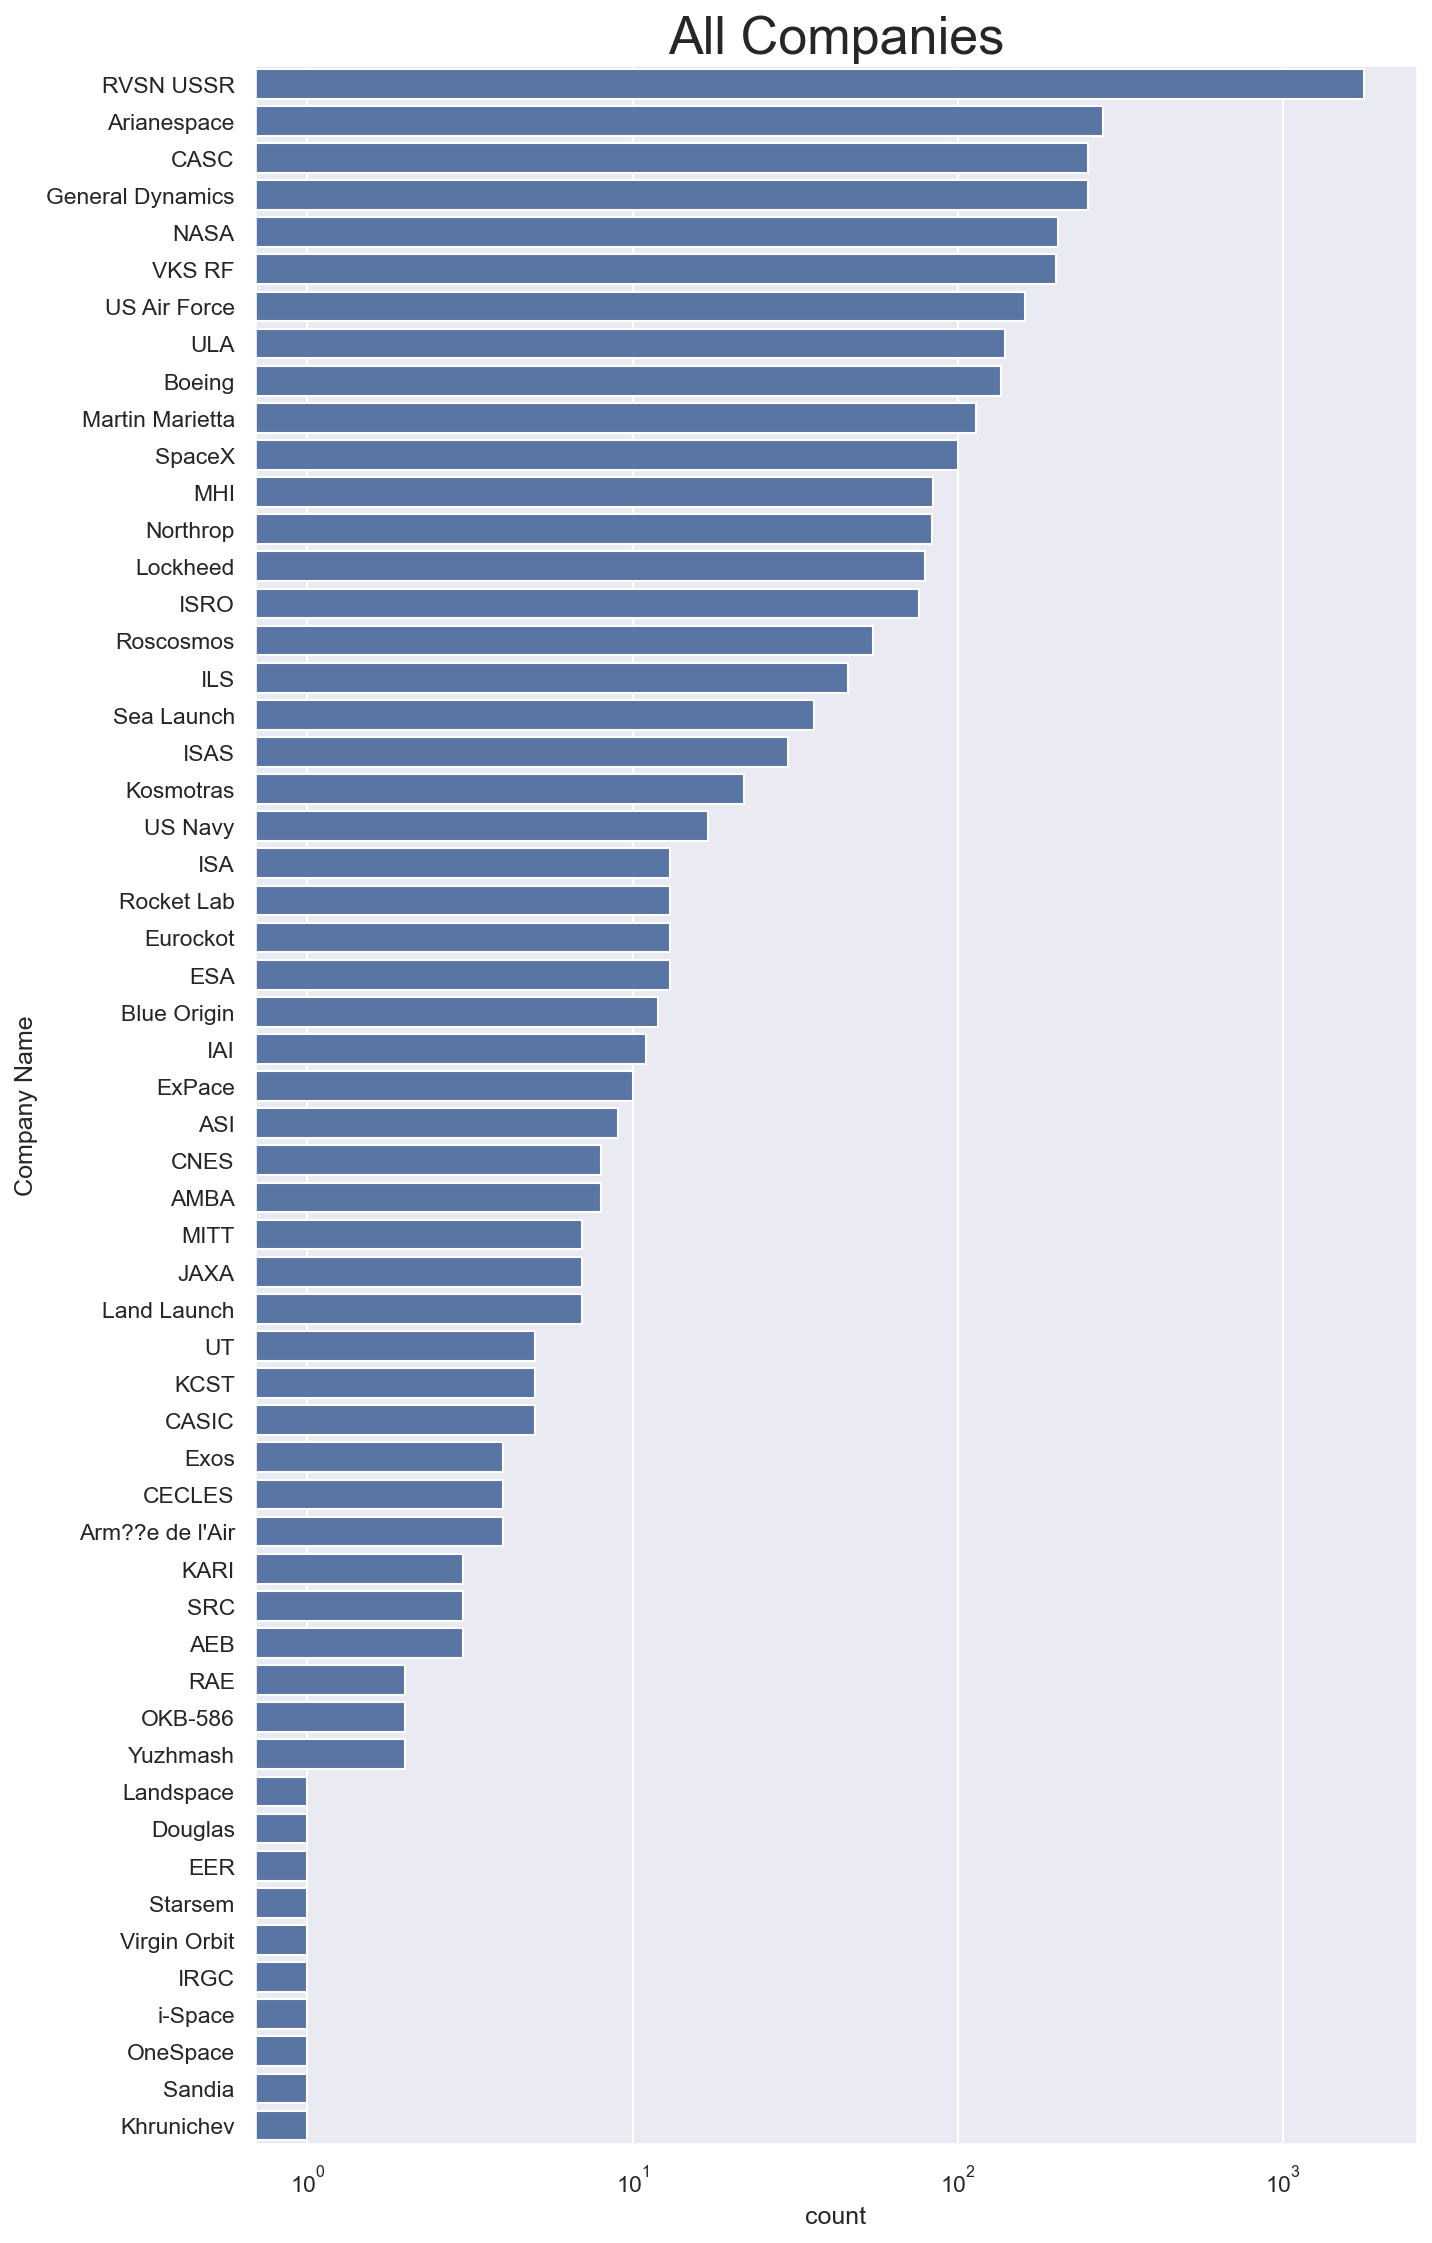

In [12]:
plt.figure(figsize=(10, 18), dpi=150)
ax = sns.countplot(
    y="Company Name", data=df, order=df["Company Name"].value_counts().index
)
ax.set_xscale("log")
plt.title("All Companies", size=25)
plt.savefig("../images/all_companies.png", bbox_inches="tight")

**RVSN USSR is the company to launch the most rockets. Also, RSVN USSR does not exist anymore after the disintegration of USSR. Roscosmos is the new space agency of Russia which sits on the 16th place in our list.**


#### Top 20 space companies


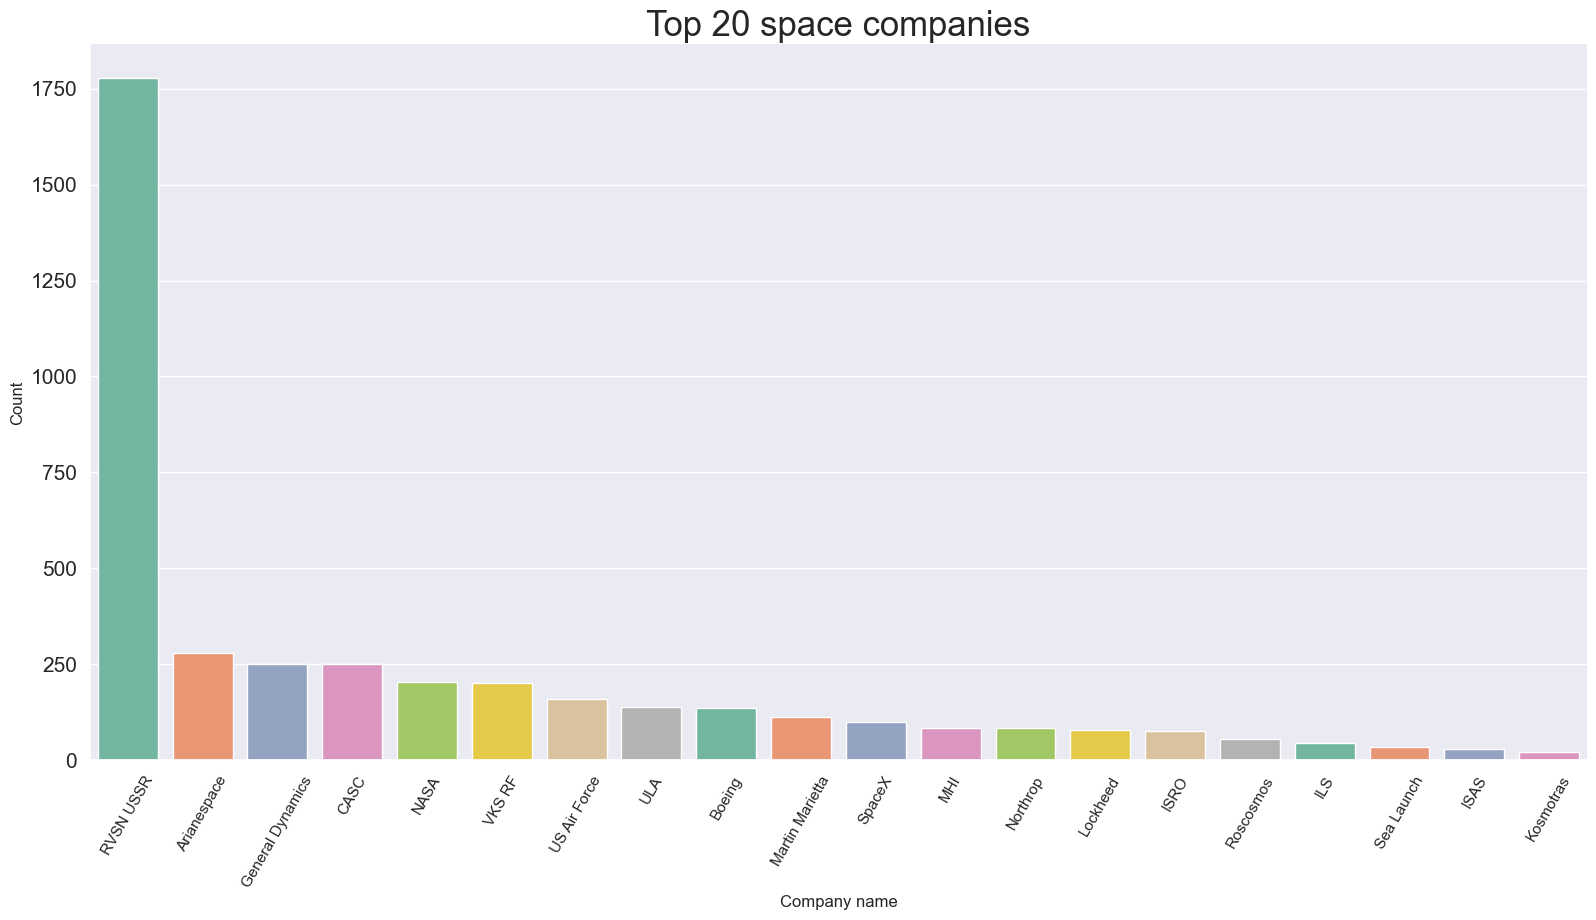

In [13]:
df["Count"] = 1
df_comps = (
    df.groupby("Company Name")["Count"]
    .sum()
    .reset_index()
    .sort_values(by="Count", ascending=False)
)
df_comps = df_comps.head(20)
sns.catplot(
    data=df_comps,
    x="Company Name",
    y="Count",
    hue="Company Name",
    palette="Set2",
    kind="bar",
    aspect=2,
    height=8,
    legend=False,
)
plt.title("Top 20 space companies", size=25)
plt.xticks(rotation=60)
plt.xlabel("Company name")
plt.yticks(size=15)
plt.savefig("../images/top_20_space_companies.png", bbox_inches="tight")

#### The top 15 companies in satellite mission


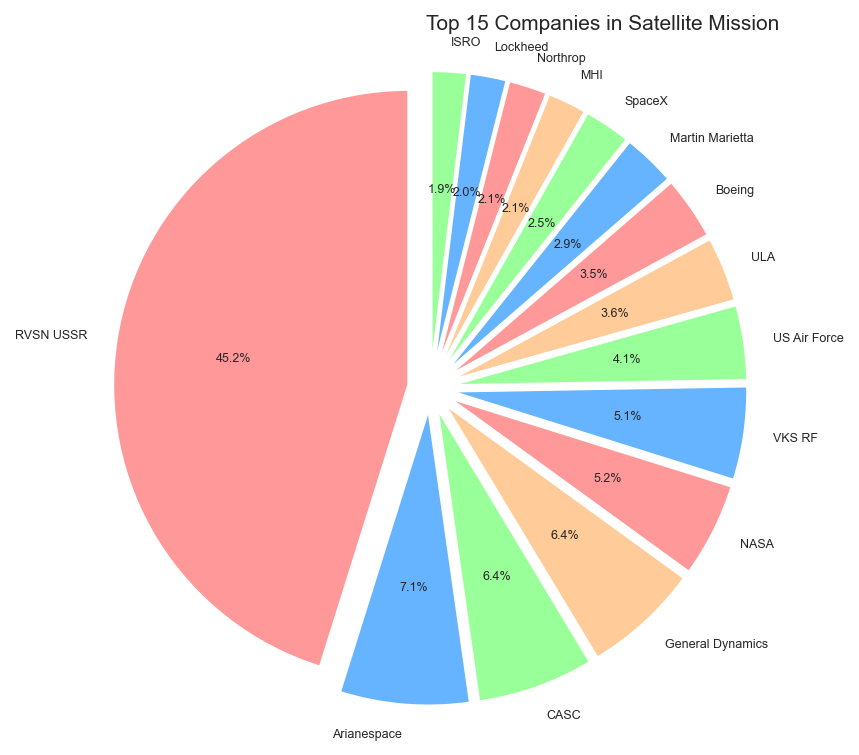

In [14]:
labels = list(df["Company Name"].value_counts()[:15].keys())
sizes = df["Company Name"].value_counts()[:15]
explode = []
for i in labels:
    explode.append(0.075)
plt.figure(figsize=(6, 6), dpi=150)
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
plt.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct="%1.1f%%",
    startangle=90,
    shadow=False,
    textprops={"fontsize": 6},
    colors=colors,
)
plt.title("Top 15 Companies in Satellite Mission", fontsize=10, loc="right")
plt.axis("equal")
plt.savefig("../images/top_15_companies_in_satellite_mission.png", bbox_inches="tight")

### Location


#### Countplot of Missions by Countries


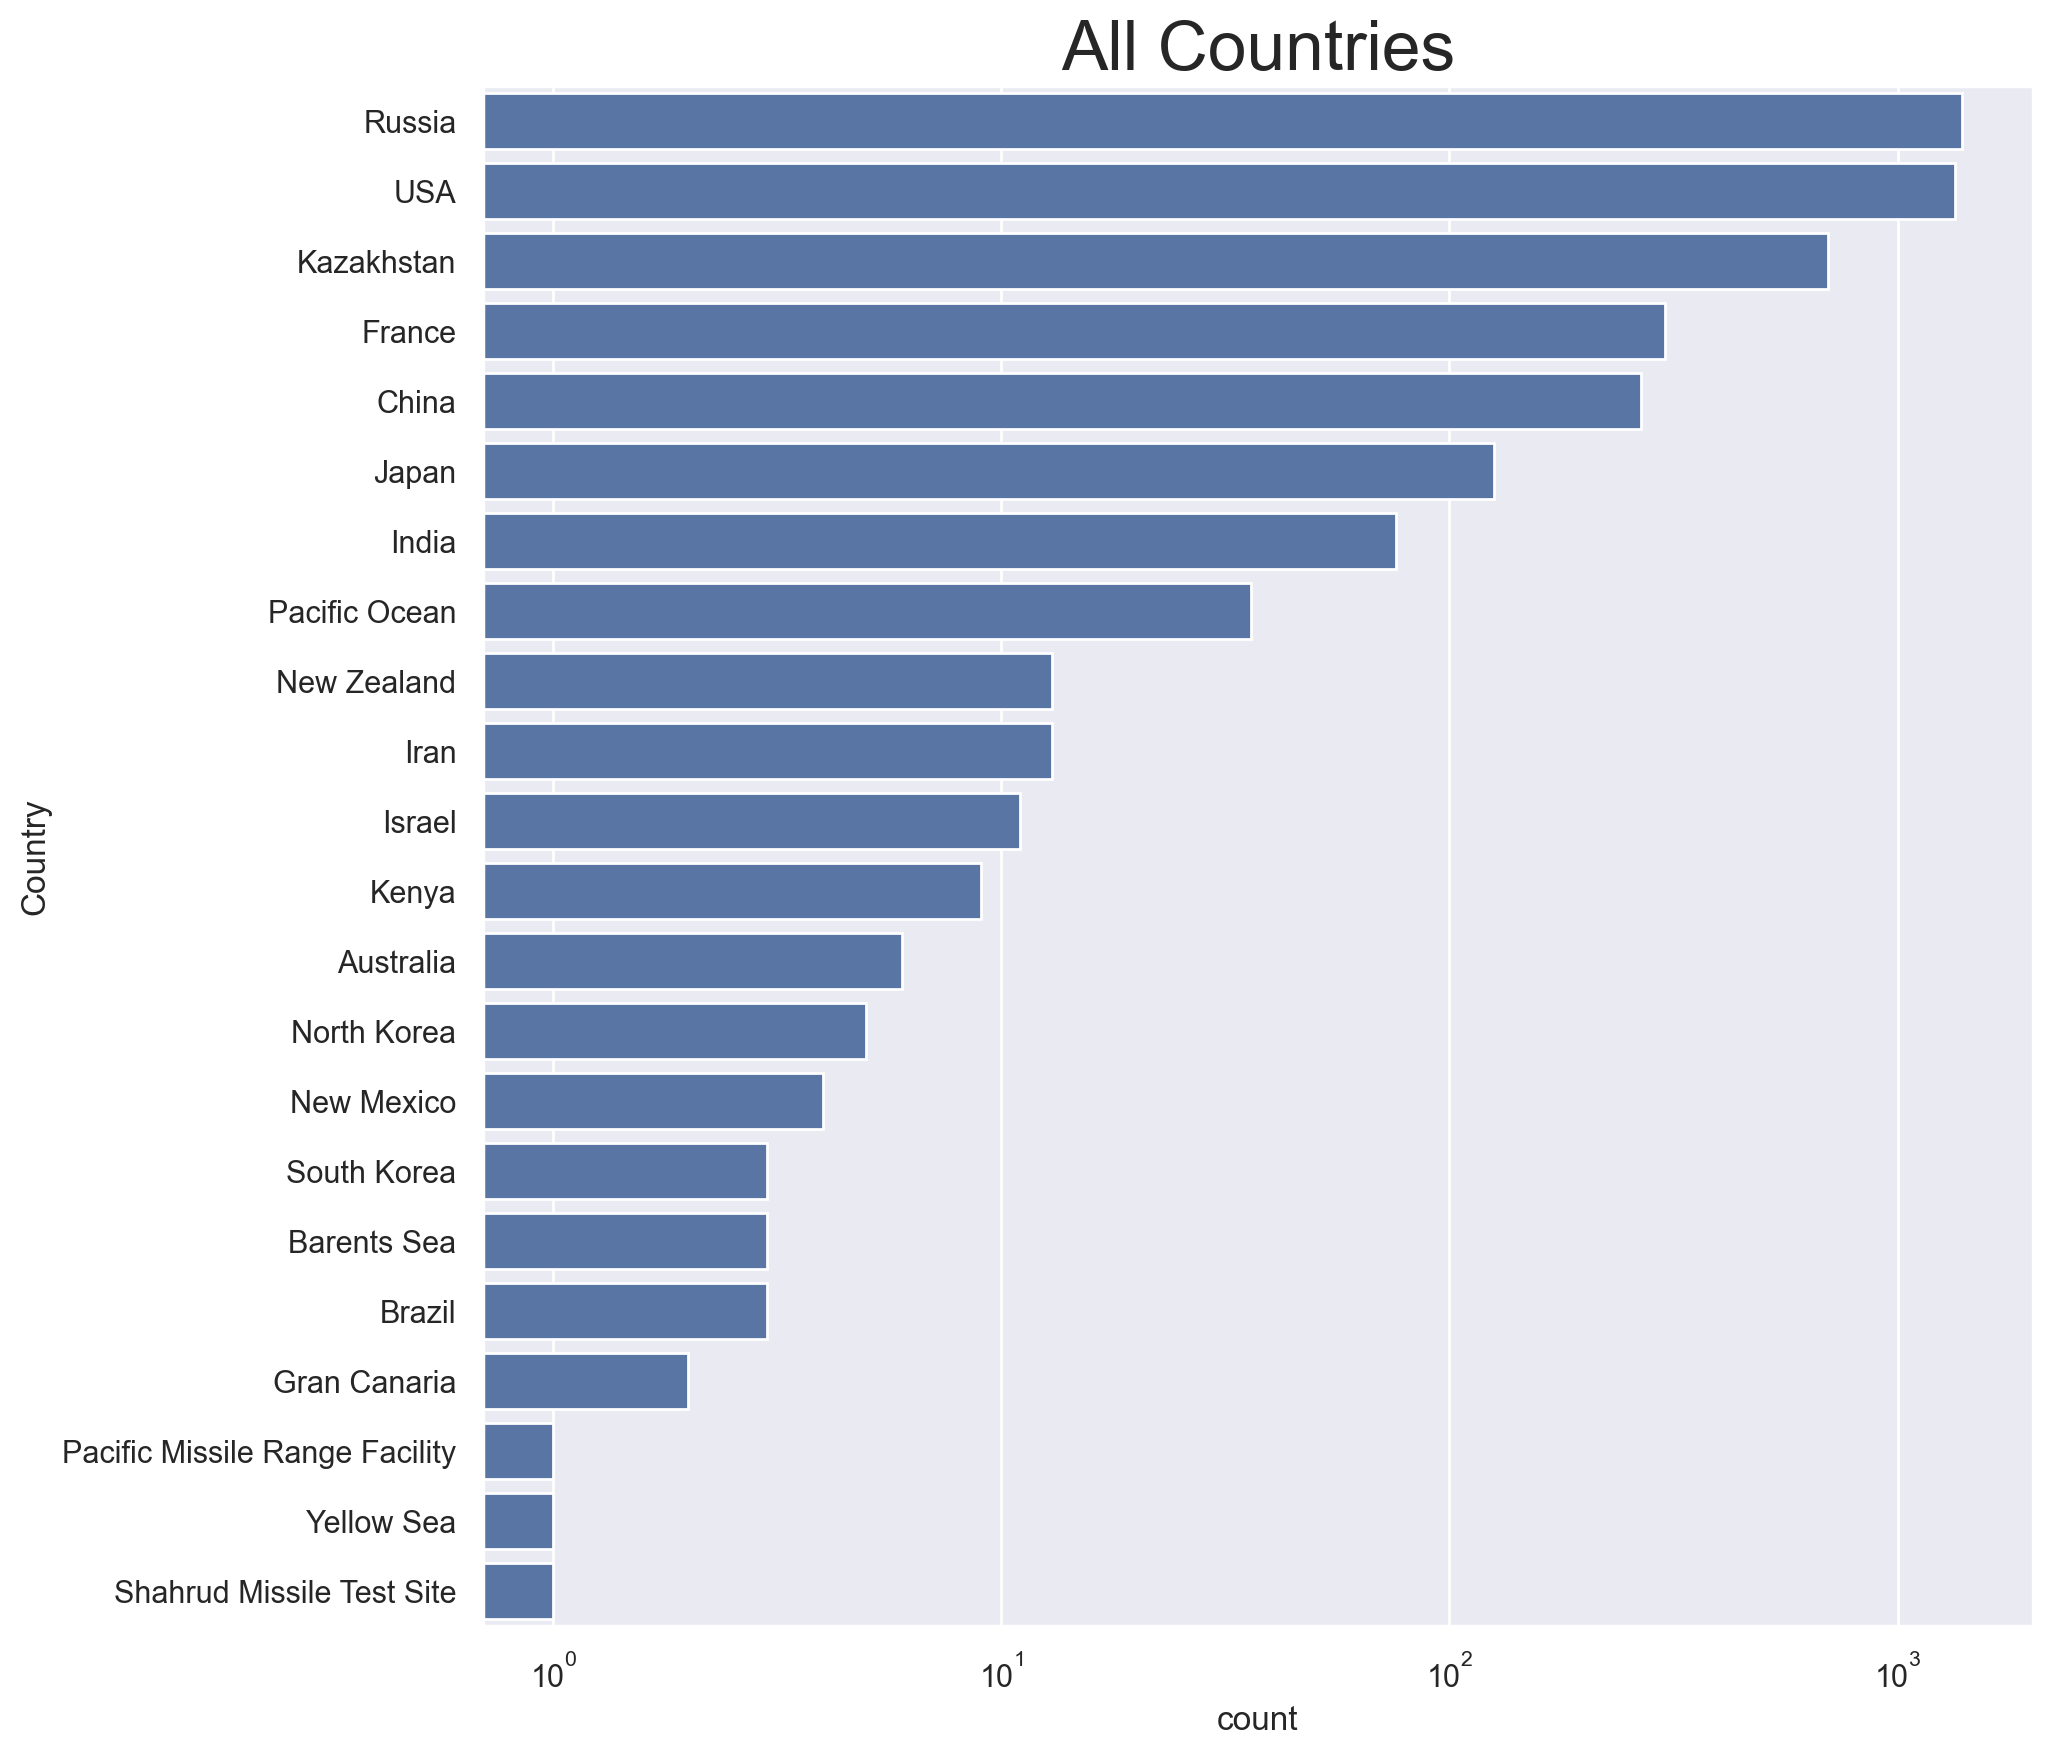

In [15]:
plt.figure(figsize=(10, 10), dpi=200)
ax = sns.countplot(y="Country", data=df, order=df["Country"].value_counts().index)
ax.set_xscale("log")
plt.title("All Countries", size=25)
plt.savefig("../images/all_countries.png", bbox_inches="tight")

**We infer that Russia had the most space missions, also quite evident from the fact that RSVN USSR is the company to have the most space launches. USA was just short of them while India sits at 7th place.**


#### Top 10 Countries leading the space launches


<Figure size 1500x1200 with 0 Axes>

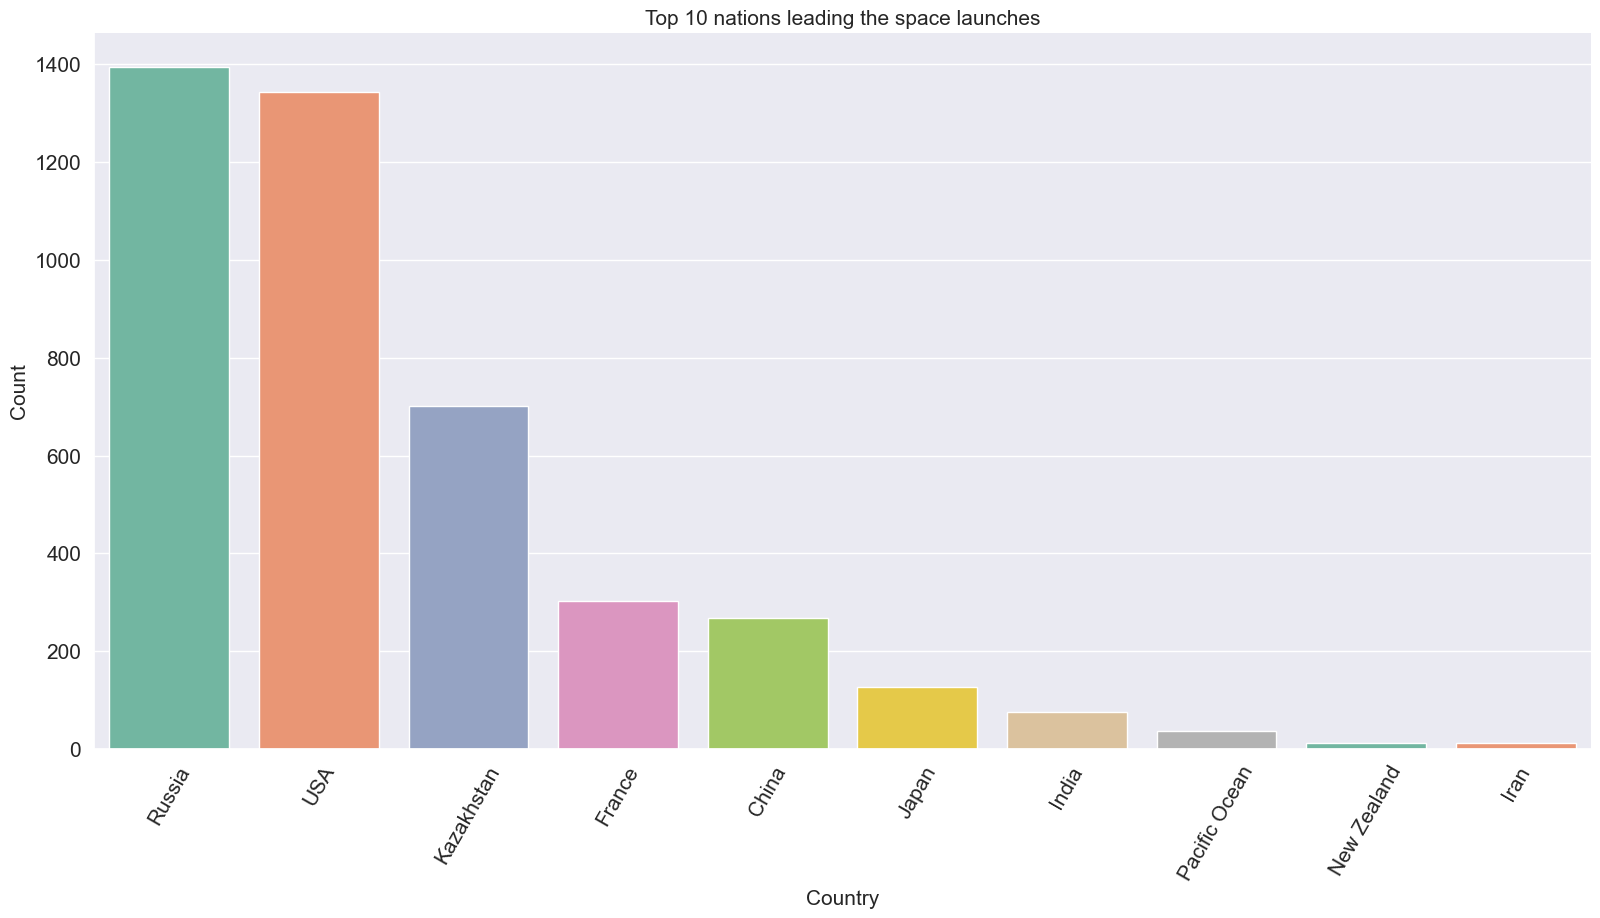

In [16]:
df_countries = (
    df.groupby("Country")["Count"]
    .sum()
    .reset_index()
    .sort_values(by="Count", ascending=False)
)
df_countries = df_countries.head(10)
plt.figure(figsize=(10, 8), dpi=150)
sns.catplot(
    data=df_countries,
    x="Country",
    y="Count",
    hue="Country",
    palette="Set2",
    aspect=2,
    height=8,
    kind="bar",
    legend=False,
)
plt.title("Top 10 nations leading the space launches", size=15)
plt.xticks(size=15, rotation=60)
plt.xlabel("Country", size=15)
plt.ylabel("Count", size=15)
plt.yticks(size=15)
plt.savefig(
    "../images/top_10_nations_leading_the_space_launches.png", bbox_inches="tight"
)

#### Countplot of Missions by Launch Sites


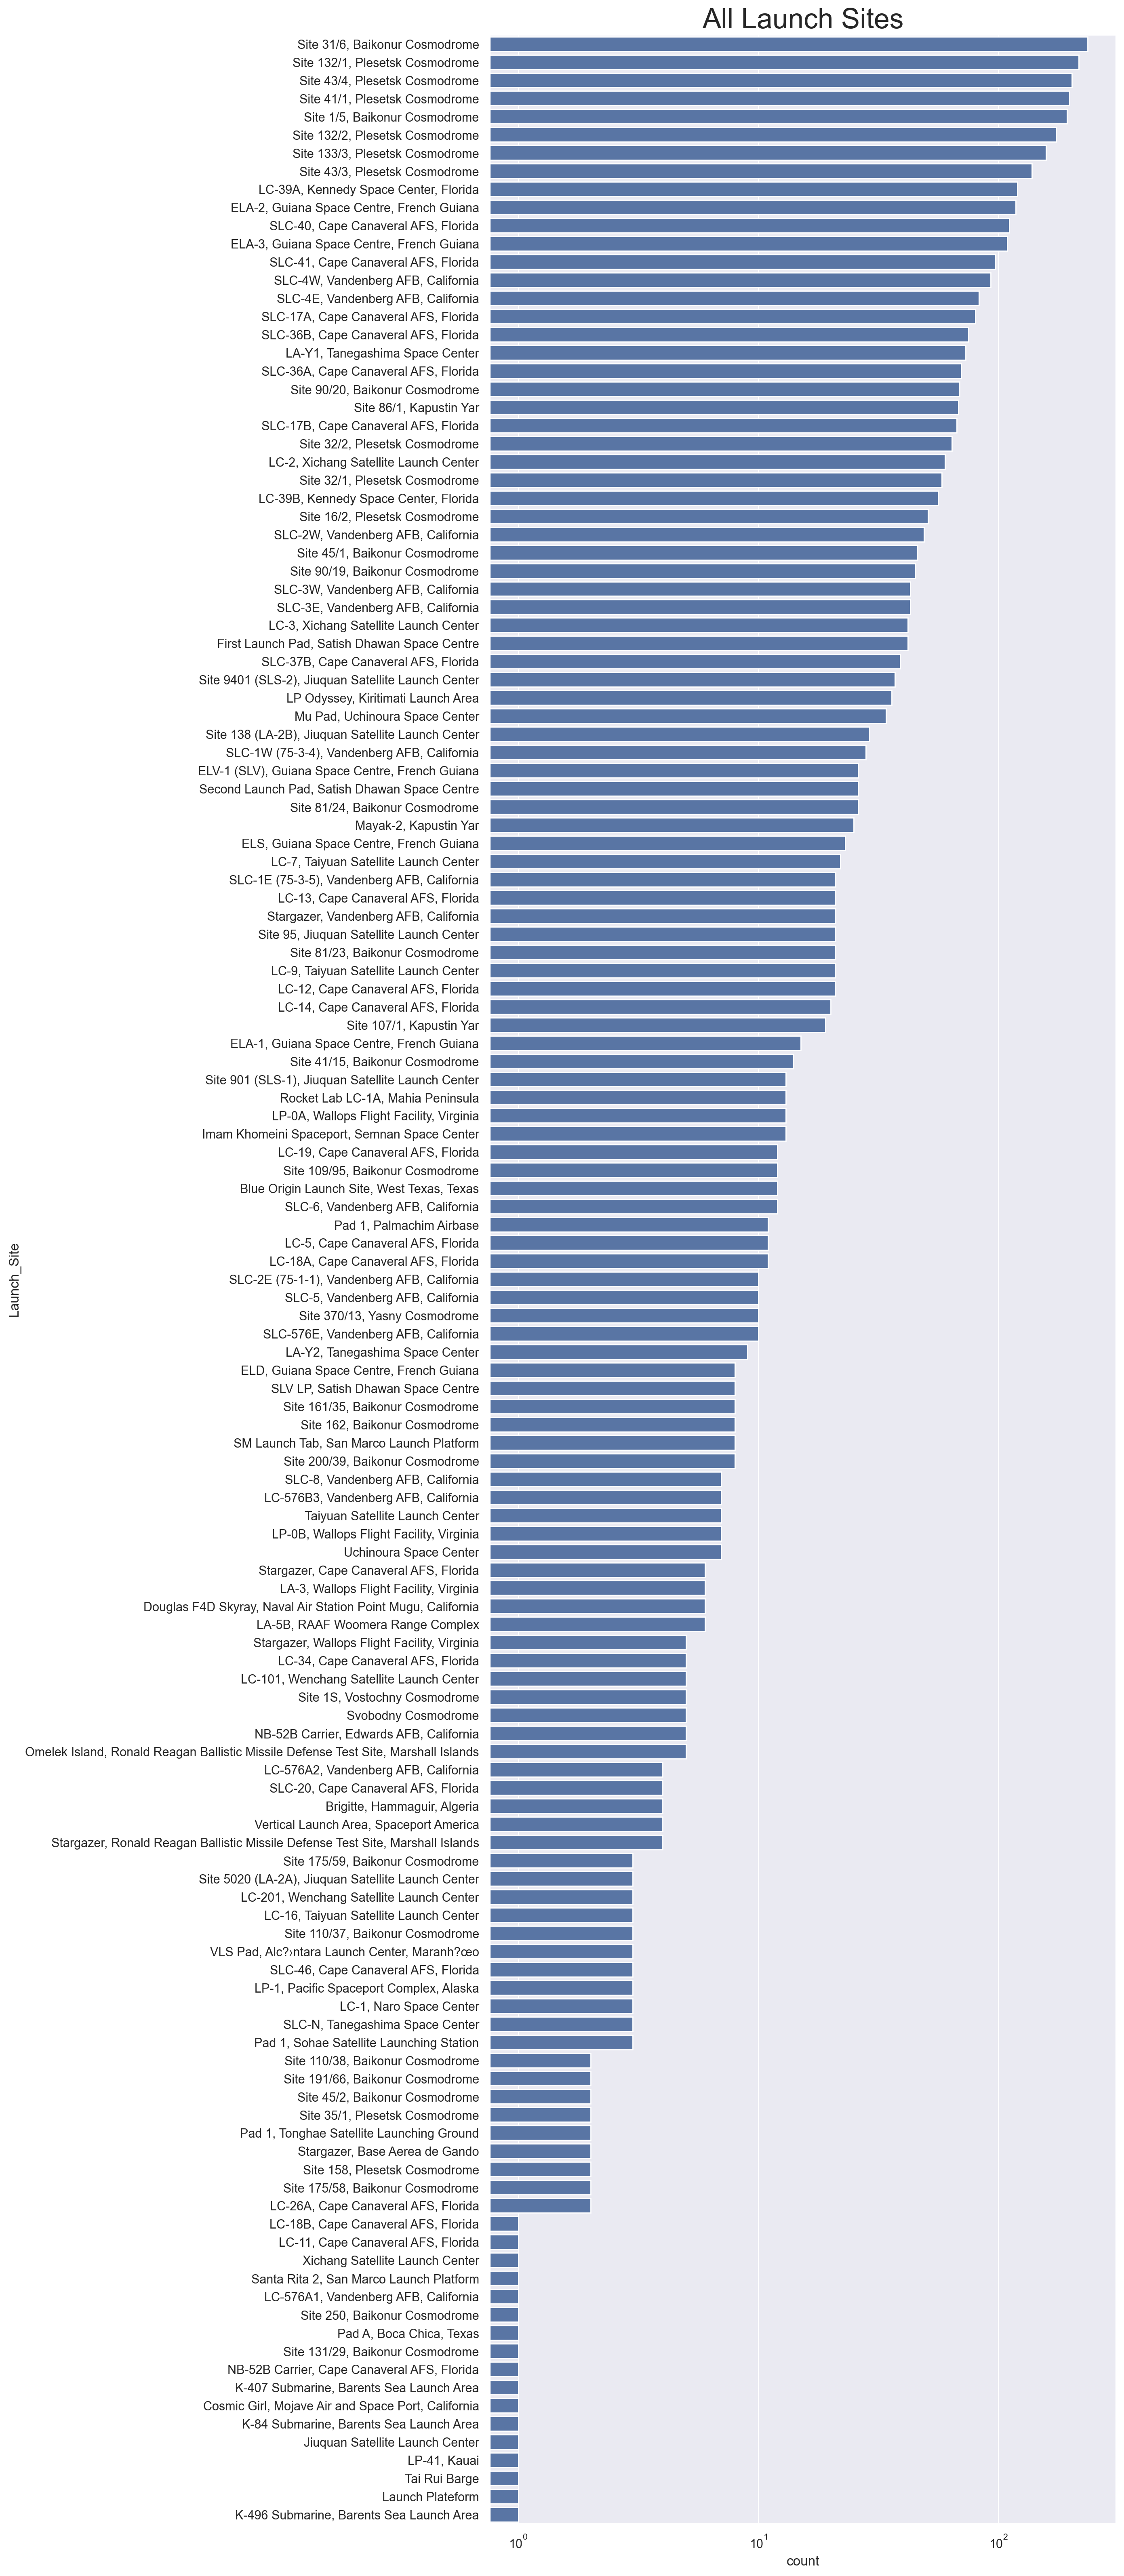

In [17]:
plt.figure(figsize=(10, 40), dpi=200)
ax = sns.countplot(
    y="Launch_Site", data=df, order=df["Launch_Site"].value_counts().index
)
ax.set_xscale("log")
plt.title("All Launch Sites", size=25)
plt.savefig("../images/all_launch_sites.png", bbox_inches="tight")

**From this plot, we can see that Site 31/6, Baikonur Cosmodrone is the most used launch site and it is one of the testing sites of RSVN USSR.**


### Datum


#### Countplot of launches by year


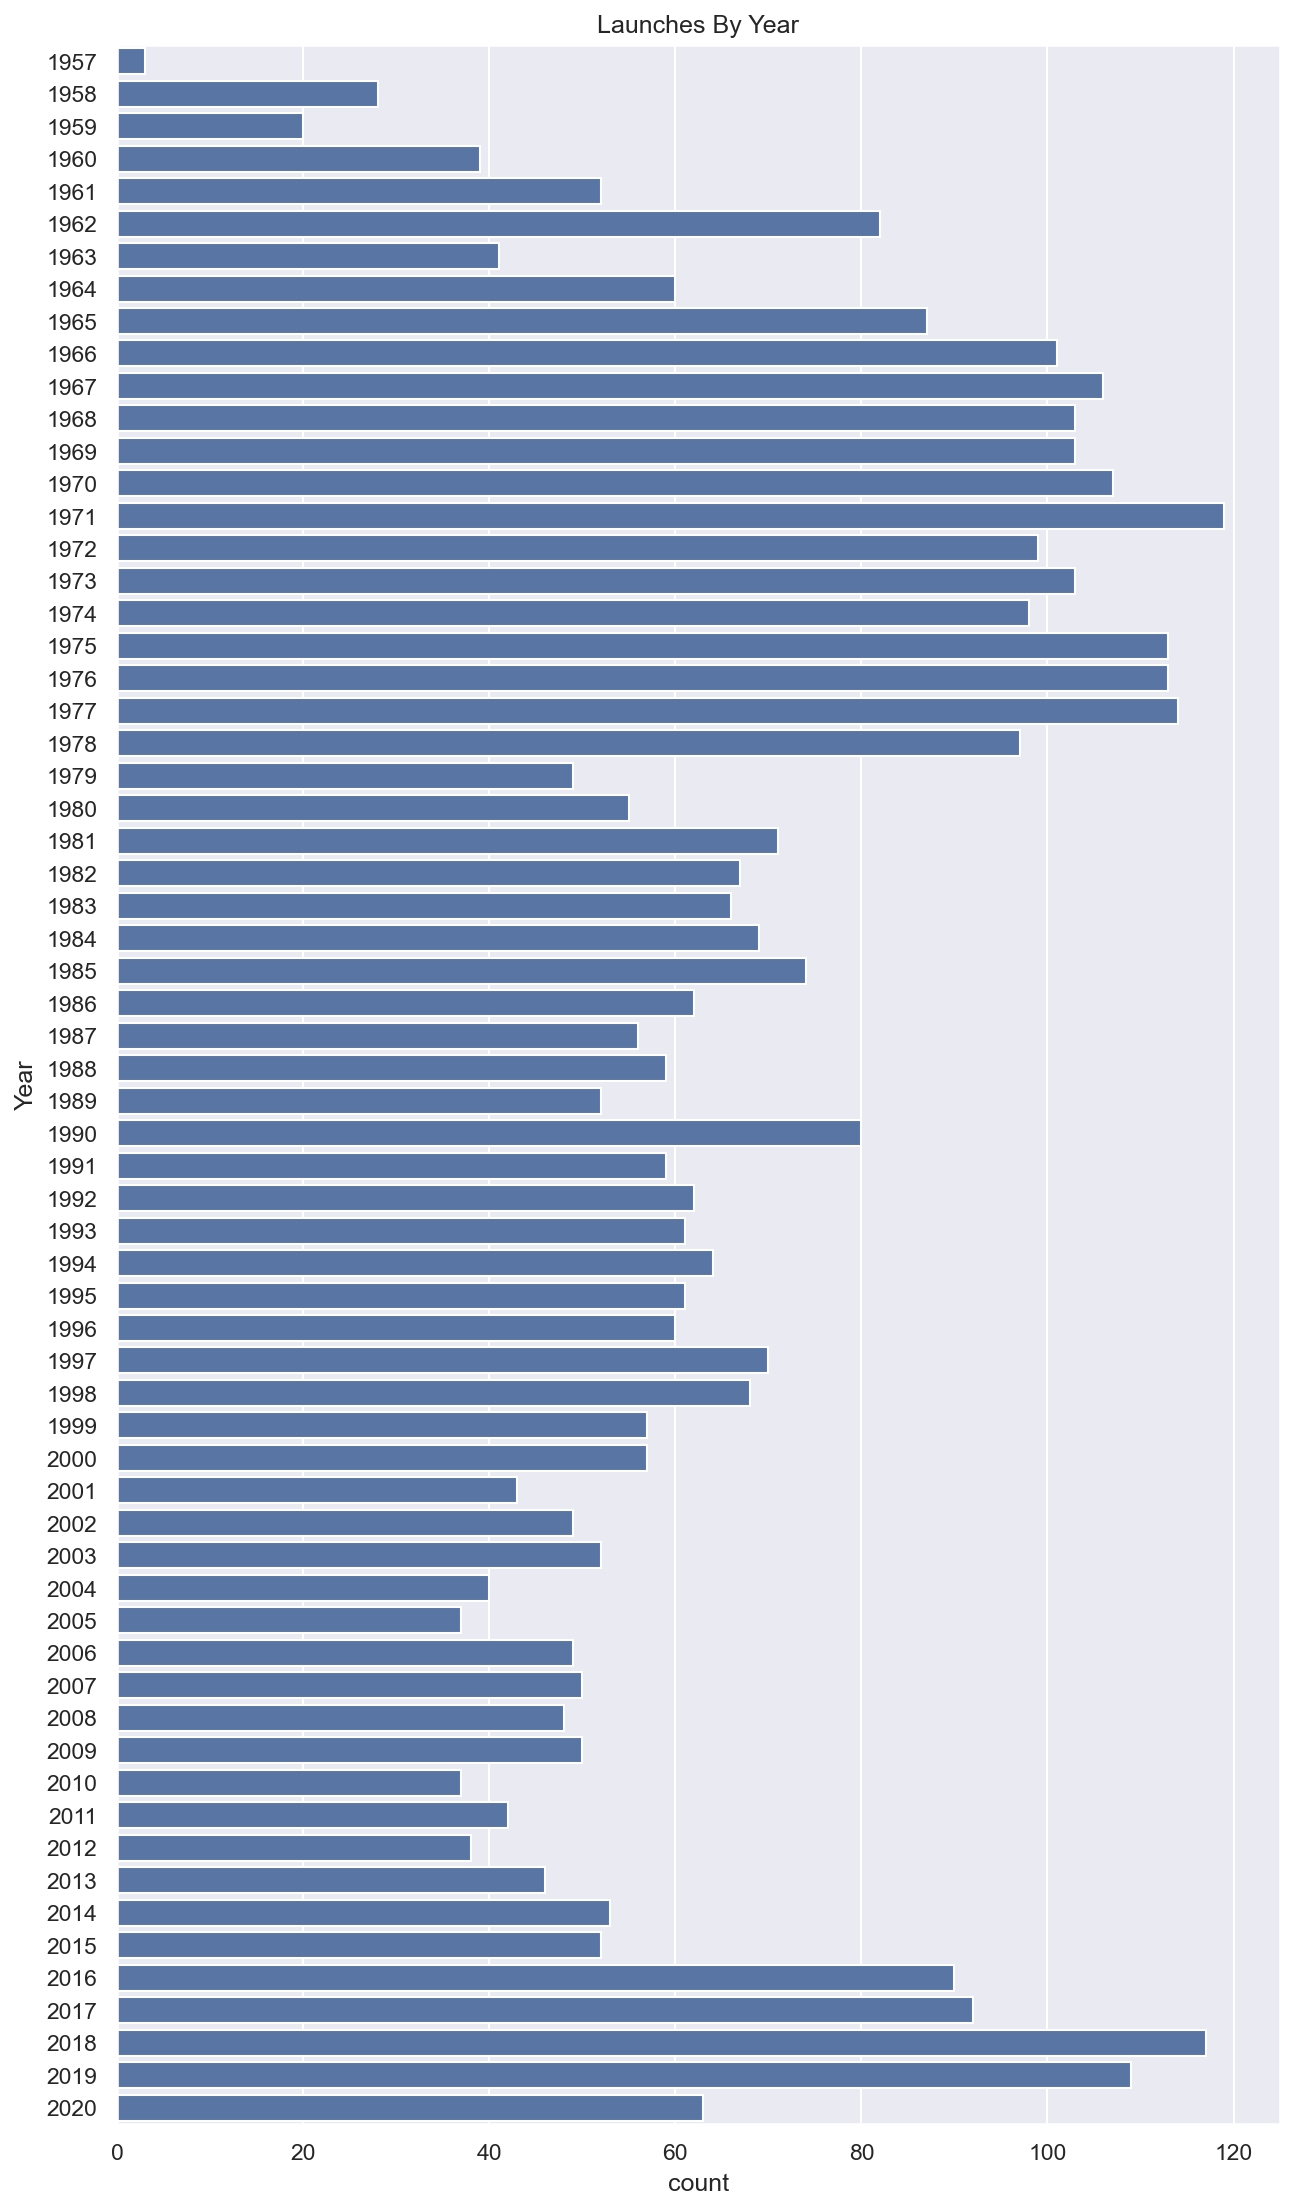

In [18]:
plt.figure(figsize=(10, 18), dpi=150)
sns.countplot(data=df, y="Year")
plt.title("Launches By Year")
plt.savefig("../images/launches_by_year.png", bbox_inches="tight")

**So we infer from this plot that 1972 was the year in which most rockets were launched. It was the year when Apollo 16 was launched and the space race was at its peak. 2018 was the year with most launches after 1972.**


#### Frequency of Launches by Year


<Figure size 1500x900 with 0 Axes>

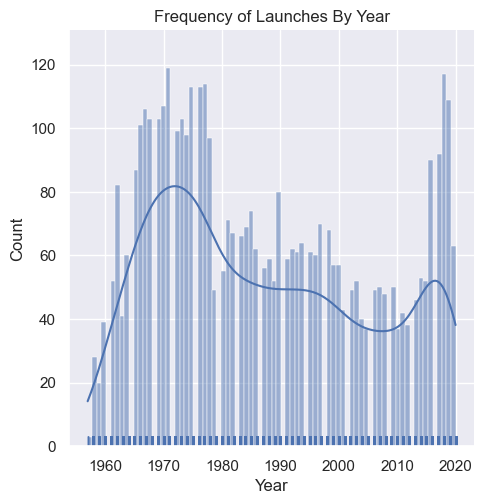

In [19]:
plt.figure(figsize=(10, 6), dpi=150)
sns.displot(df["Year"], kde=True, rug=True, bins=80)  # type: ignore
plt.title("Frequency of Launches By Year")
plt.savefig("../images/frequency_of_launches_by_year.png", bbox_inches="tight")

#### Number of Launches By Month


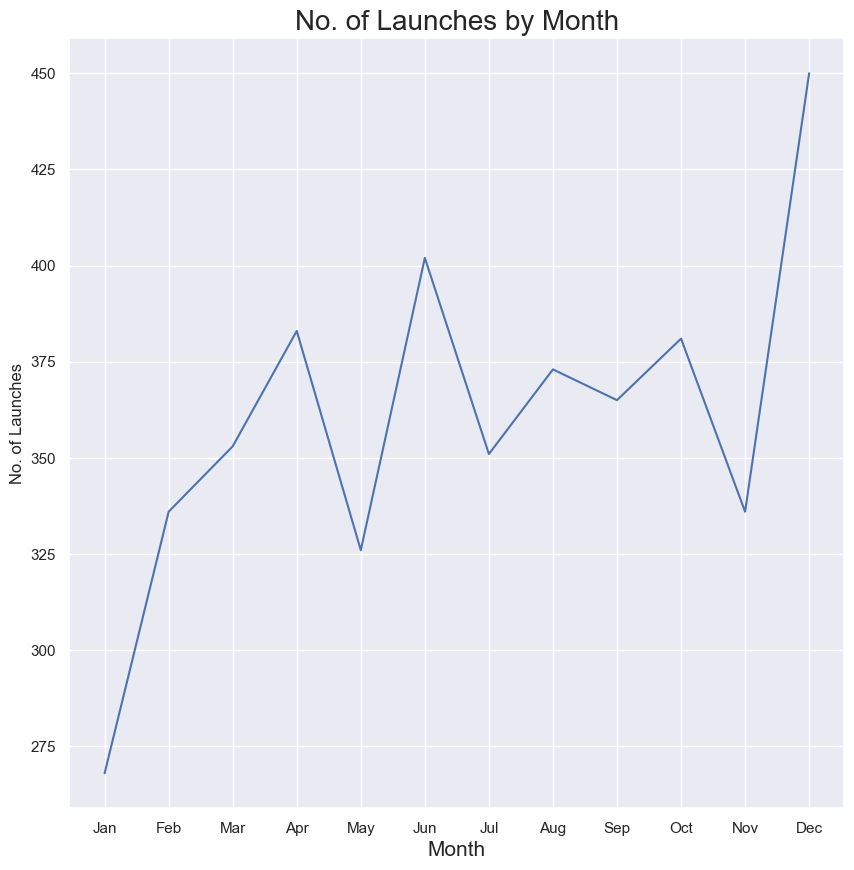

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("No. of Launches by Month", fontsize=20)
month_df = pd.DataFrame()
df["Month"] = df["Datum"].apply(lambda datum: datum.split()[1])
month_df["Month"] = df["Month"].value_counts().index
month_df["Launches"] = df["Month"].value_counts().values
order = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
sorter = [order.index(i) for i in month_df["Month"]]
month_df["Sorter"] = sorter
sns.lineplot(
    x="Month", y="Launches", data=month_df.sort_values(by="Sorter"), sort=False
)
ax.set_xlabel("Month", fontsize=15)
ax.set_ylabel("No. of Launches")
plt.savefig("../images/no_of_launches_by_month.png", bbox_inches="tight")

**We can see that moat missions happen between November and December. This can be due to the fact that weather is quite good at this time of the year**


#### Launches in 2020 by different Companies


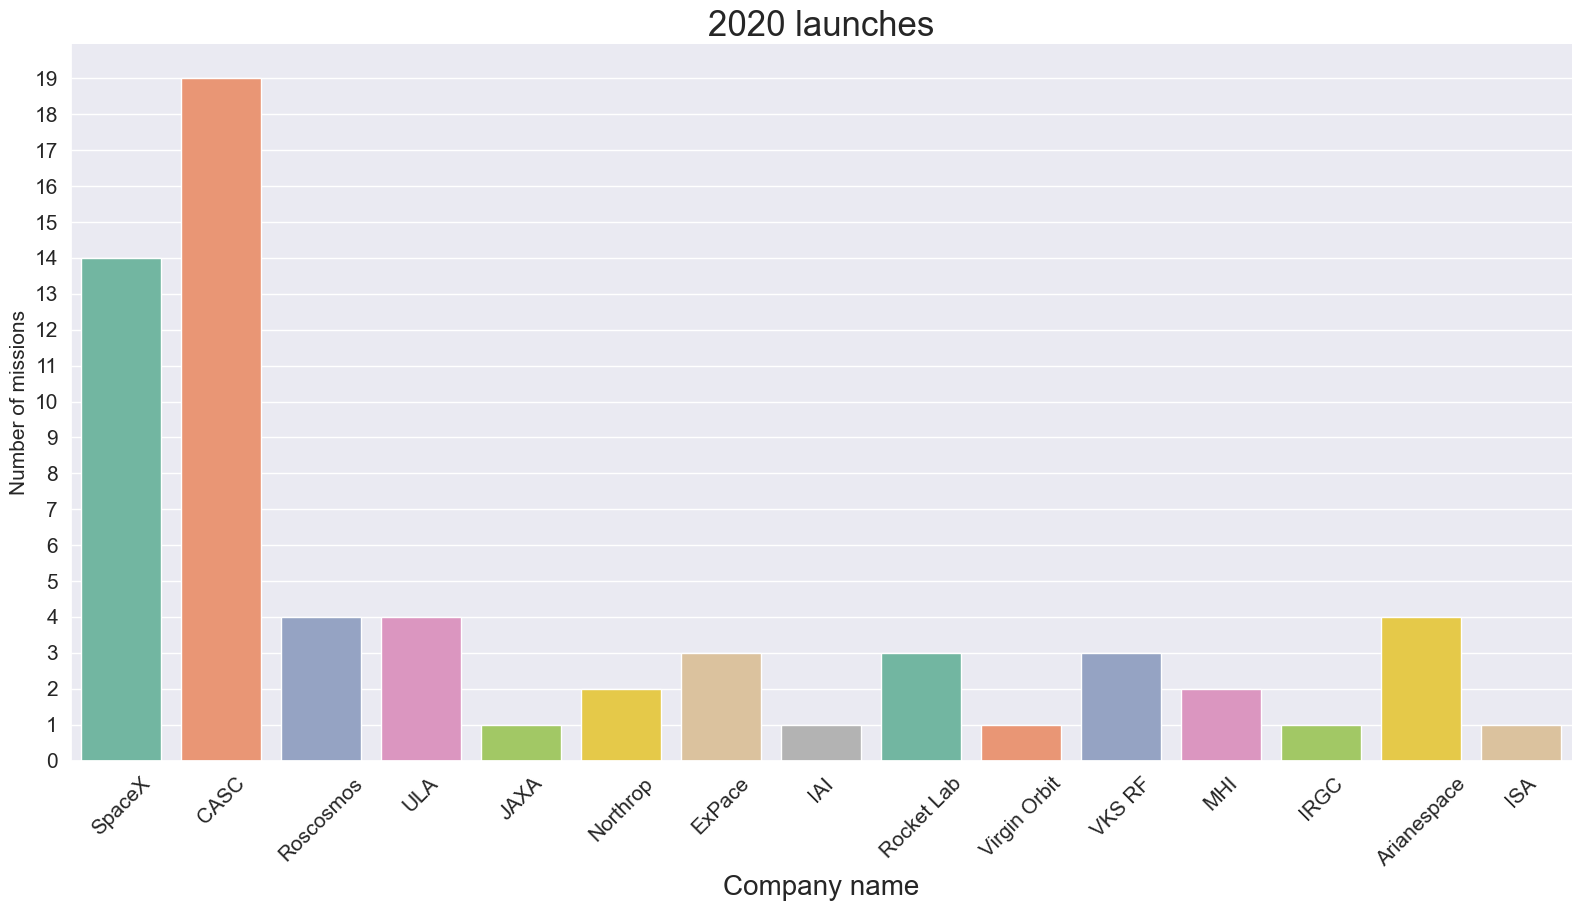

In [21]:
df_2020 = df[df["Year"] == 2020]
sns.catplot(
    data=df_2020,
    x="Company Name",
    kind="count",
    aspect=2,
    height=8,
    palette="Set2",
    hue="Company Name",
    legend=False,
)
plt.yticks(np.arange(20))
plt.title("2020 launches", size=25)
plt.xlabel("Company name", size=20)
plt.xticks(size=15, rotation=45)
plt.yticks(size=15)
plt.ylabel("Number of missions", size=15)
plt.savefig("../images/2020_launches.png", bbox_inches="tight")

**Launches in 2020 are led by Elon Musk's Space-X, while we see that new companies like Rocket Lab, Virgin Orbit are also launching quite a few **


### Money


#### Money Spent by Companies


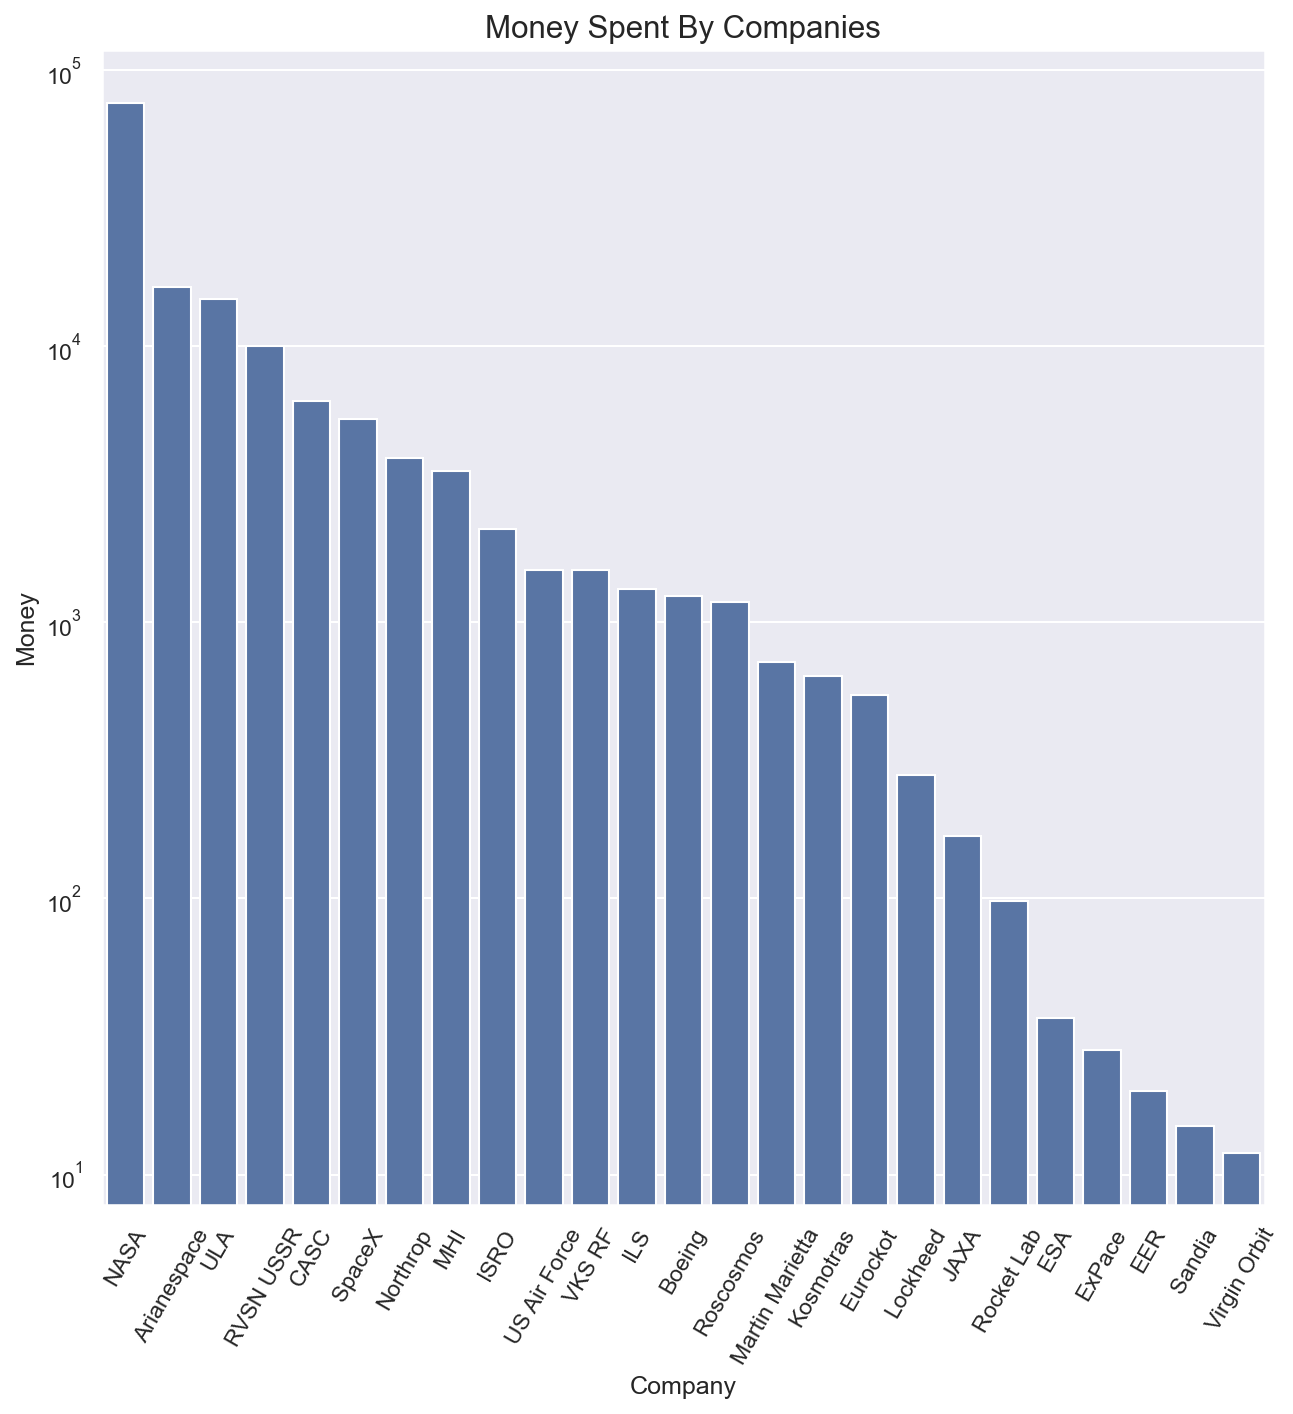

In [22]:
df.Rocket = df.Rocket.apply(lambda x: str(x).strip()).astype("float64")
data = df.groupby(["Company Name"])["Rocket"].sum().reset_index()
data = data[data["Rocket"] > 0].sort_values(by="Rocket", ascending=False)
data.columns = ["Company", "Money"]
plt.figure(figsize=(10, 10), dpi=150)
plt.title("Money Spent By Companies", size=15)
ax = sns.barplot(data=data, x="Company", y="Money")
ax.set_yscale("log")
plt.xticks(rotation=60)
plt.savefig("../images/money_spent_by_companies.png", bbox_inches="tight")

**While RSVN USSR may have the most launches but NASA tops the charts when it comes to spending Money.**


### Mission and Rocket Status


#### Countplot of Mission Status


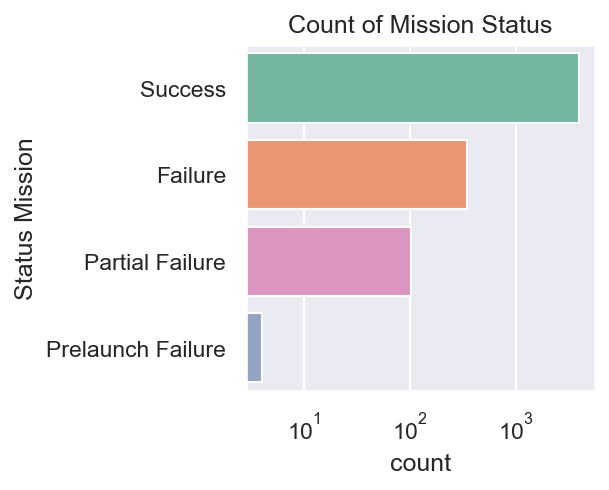

In [23]:
plt.figure(figsize=(3, 3), dpi=150)
ax = sns.countplot(
    data=df,
    y="Status Mission",
    hue="Status Mission",
    order=df["Status Mission"].value_counts().index,
    palette="Set2",
    legend=False,
)
ax.set_xscale("log")
plt.title("Count of Mission Status")
plt.savefig("../images/count_of_mission_status.png", bbox_inches="tight")

**From the plot, its clearly visible that most of the missions were successful and very few were a prelaunch failure**


#### Pie Chart of Mission Status


In [24]:
fig = px.pie(
    df, names="Status Mission", title="Status of Mission", width=600, height=400
)
plt.savefig("../images/status_of_mission.png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

**Roughly 90% of the missions till date were a success.**


#### Countplot of Missions by Rocket Retirement Status


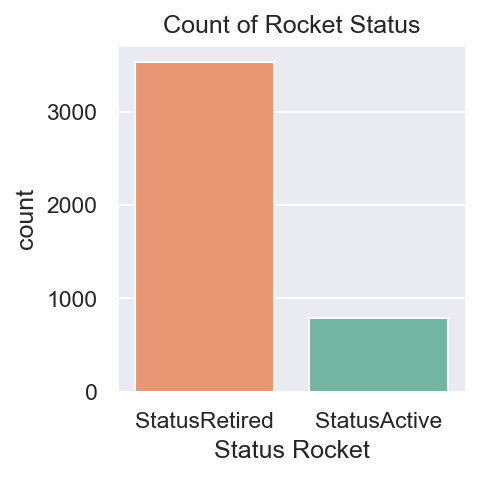

In [25]:
plt.figure(figsize=(3, 3), dpi=150)
sns.countplot(
    data=df,
    x="Status Rocket",
    hue="Status Rocket",
    order=df["Status Rocket"].value_counts().index,
    palette="Set2",
    legend=False,
)
plt.title("Count of Rocket Status")
plt.savefig("../images/count_of_rocket_status.png", bbox_inches="tight")

**Clearly, most of the launch vehicles used or the satellites launched are retired.**


# ISRO Data Analysis

![](https://www.isro.gov.in/sites/default/files/galleries/गैलरी/19take.jpg)


In [26]:
df_isro = df[df["Company Name"] == "ISRO"]

In [27]:
df_isro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 72 to 2502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Company Name    76 non-null     object             
 1   Location        76 non-null     object             
 2   Datum           76 non-null     object             
 3   Detail          76 non-null     object             
 4   Status Rocket   76 non-null     object             
 5   Rocket          67 non-null     float64            
 6   Status Mission  76 non-null     object             
 7   Country         76 non-null     object             
 8   DateTime        76 non-null     datetime64[ns, UTC]
 9   Year            76 non-null     int64              
 10  Launch_Site     76 non-null     object             
 11  Count           76 non-null     int64              
 12  Month           76 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(1), 

In [28]:
df_isro.head(10)

Company Name                                           Location  \
72          ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
80          ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
121         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
138         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
149         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
164         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
179         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
188         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   
195         ISRO  Second Launch Pad, Satish Dhawan Space Centre,...   
215         ISRO  First Launch Pad, Satish Dhawan Space Centre, ...   

                          Datum                                     Detail  \
72   Wed Dec 11, 2019 09:55 UTC                       PSLV-QL | RISAT 2BR1   
80   Wed Nov 27, 2019 03:58 UTC          PSLV-XL | Cartosat-3 & Rideshares   
121  Mon Jul 22, 2019 09:13 UTC  GSLV Mk III | Chandrayaan-2 lunar mission   
138  Wed May 22, 2019 00:00 UTC                         PSLV-CA | RISAT-2B   
149  Mon Apr 01, 2019 03:57 UTC              PSLV-QL | EMISAT & Rideshares   
164  Thu Jan 24, 2019 18:07 UTC                       PSLV-DL | Microsat-R   
179  Wed Dec 19, 2018 10:40 UTC                       GSLV Mk II | GSAT-7A   
188  Thu Nov 29, 2018 04:27 UTC                            PSLV-CA | HySIS   
195  Wed Nov 14, 2018 11:38 UTC                      GSLV Mk III | GSAT 29   
215  Sun Sep 16, 2018 16:38 UTC               PSLV-CA | SSTL-1 & NovaSAR-S   

    Status Rocket  Rocket Status Mission Country                  DateTime  \
72   StatusActive    21.0        Success   India 2019-12-11 09:55:00+00:00   
80   StatusActive    31.0        Success   India 2019-11-27 03:58:00+00:00   
121  StatusActive    62.0        Success   India 2019-07-22 09:13:00+00:00   
138  StatusActive    21.0        Success   India 2019-05-22 00:00:00+00:00   
149  StatusActive    21.0        Success   India 2019-04-01 03:57:00+00:00   
164  StatusActive     NaN        Success   India 2019-01-24 18:07:00+00:00   
179  StatusActive    47.0        Success   India 2018-12-19 10:40:00+00:00   
188  StatusActive    21.0        Success   India 2018-11-29 04:27:00+00:00   
195  StatusActive    62.0        Success   India 2018-11-14 11:38:00+00:00   
215  StatusActive    21.0        Success   India 2018-09-16 16:38:00+00:00   

     Year                                    Launch_Site  Count Month  
72   2019   First Launch Pad, Satish Dhawan Space Centre      1   Dec  
80   2019  Second Launch Pad, Satish Dhawan Space Centre      1   Nov  
121  2019  Second Launch Pad, Satish Dhawan Space Centre      1   Jul  
138  2019   First Launch Pad, Satish Dhawan Space Centre      1   May  
149  2019  Second Launch Pad, Satish Dhawan Space Centre      1   Apr  
164  2019   First Launch Pad, Satish Dhawan Space Centre      1   Jan  
179  2018  Second Launch Pad, Satish Dhawan Space Centre      1   Dec  
188  2018   First Launch Pad, Satish Dhawan Space Centre      1   Nov  
195  2018  Second Launch Pad, Satish Dhawan Space Centre      1   Nov  
215  2018   First Launch Pad, Satish Dhawan Space Centre      1   Sep

#### Status Mission for ISRO


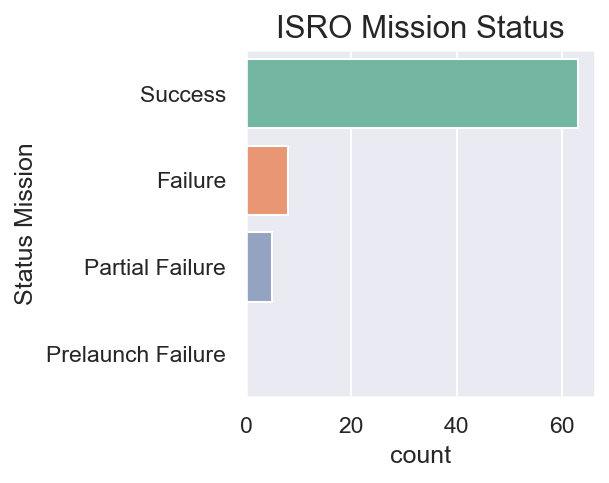

In [29]:
plt.figure(figsize=(3, 3), dpi=150)
sns.countplot(
    data=df_isro,
    y="Status Mission",
    hue="Status Mission",
    order=df["Status Mission"].value_counts().index,
    palette="Set2",
    legend=False,
)
plt.title("ISRO Mission Status", size=15)
plt.savefig("../images/isro_mission_status.png", bbox_inches="tight")

**There are no prelaunch failures and most missions were successful.**


#### COuntplot of launches by Year


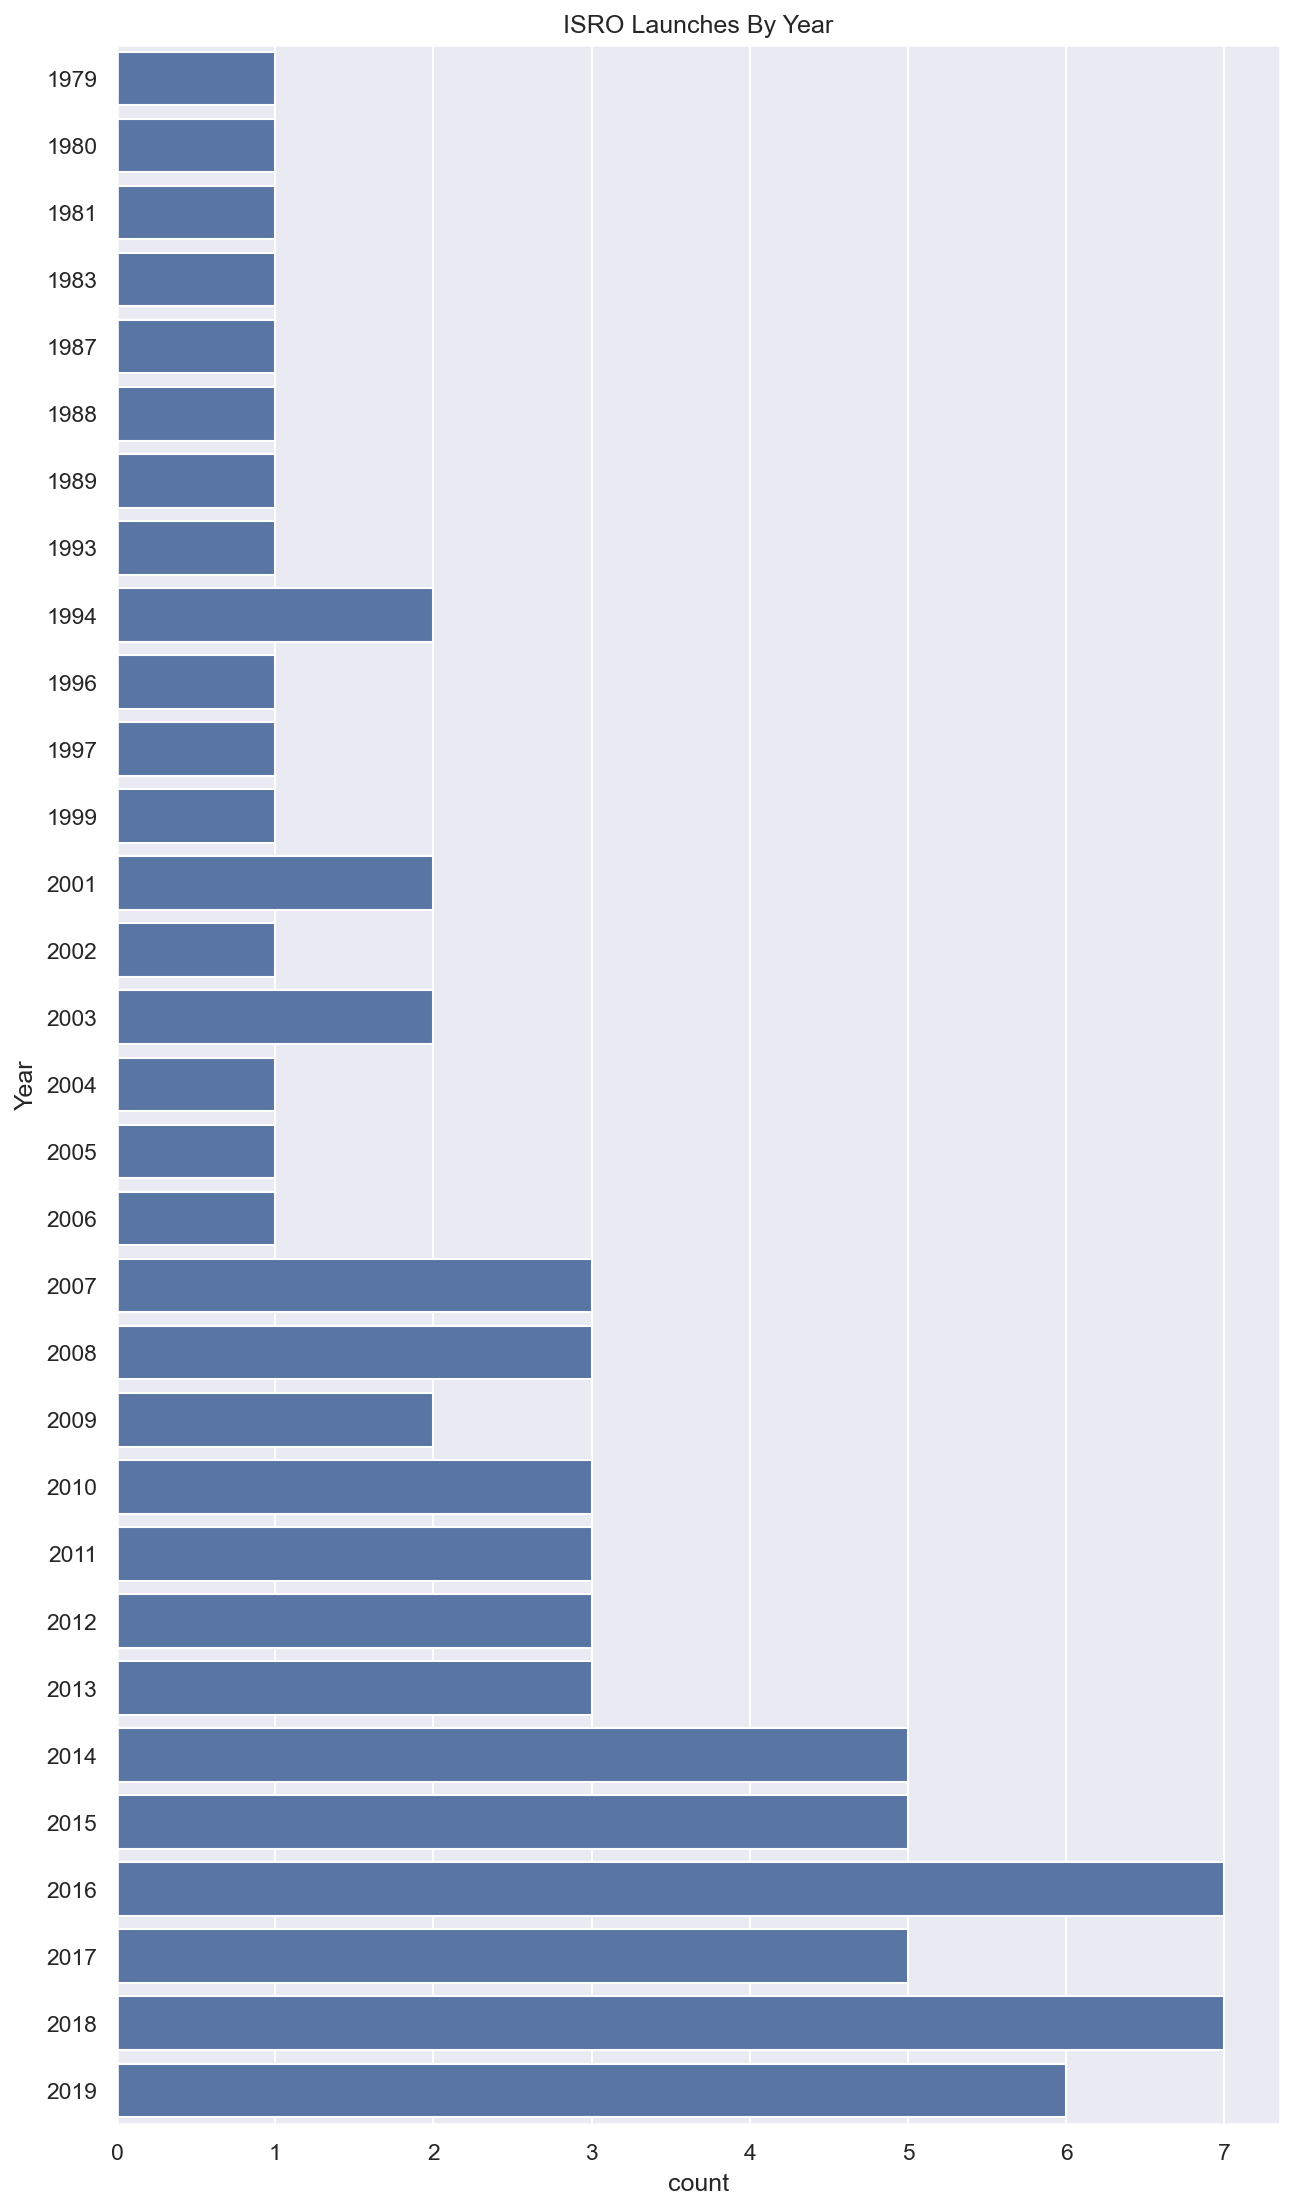

In [30]:
plt.figure(figsize=(10, 18), dpi=150)
sns.countplot(data=df_isro, y="Year")
plt.title("ISRO Launches By Year")
plt.savefig("../images/isro_launches_by_year.png", bbox_inches="tight")

**Now lets see which is the most used launch pad for isro**


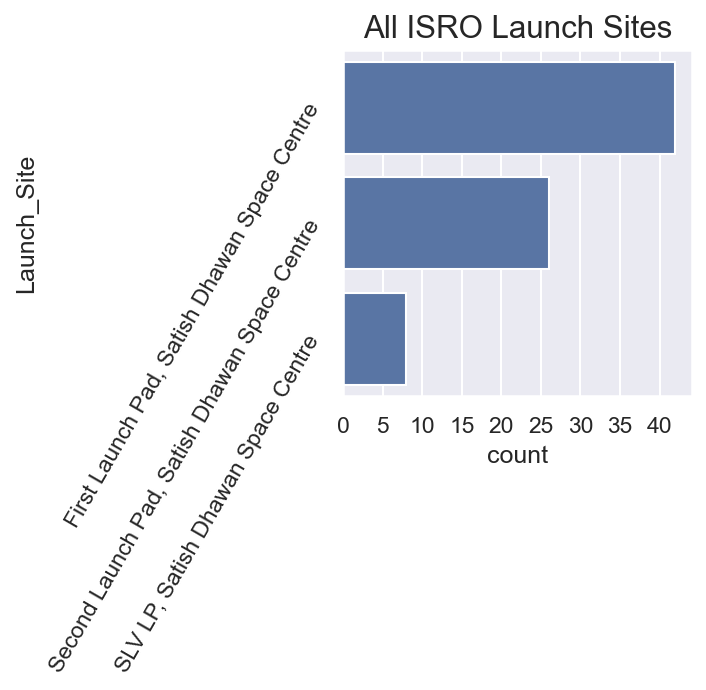

In [31]:
plt.figure(figsize=(3, 3), dpi=150)
ax = sns.countplot(
    y="Launch_Site", data=df_isro, order=df_isro["Launch_Site"].value_counts().index
)
plt.title("All ISRO Launch Sites", size=15)
plt.yticks(rotation=60)
plt.rc("xtick", labelsize=4)
plt.rc("ytick", labelsize=4)
plt.savefig("../images/all_isro_launch_sites.png", bbox_inches="tight")

**So, the most used site is First Launch pad, Satish Dhawan Space Center.**


In [32]:
df.to_csv("../datasets/Space_Exploration_Cleaned.csv", index=False)

Visualisation of Top 10 companies with highest success rate. #2


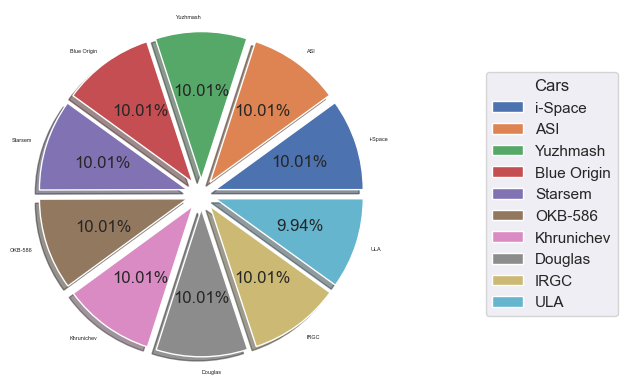

In [33]:
o = df.iloc[:, 6]
b = df.iloc[:, 0]
o = o.tolist()
des = []
for i in range(len(o)):
    if o[i] == "Success":
        des.append(1)
    else:
        des.append(0)
a1 = pd.DataFrame(b)
des = pd.Series(des, name="success")
b1 = pd.DataFrame(des)
des = pd.concat([a1, des], axis=1)
des = des.groupby("Company Name")
f1 = des.sum()
f = des.count()
g = f.iloc[:, 0]
g = g.tolist()
g1 = f1.iloc[:, 0]
g1 = g1.tolist()
ht = []
for i in range(len(g)):
    ht.append(g1[i] / g[i] * 100)
b = b.tolist()
g = {"0"}
for i in b:
    g.add(i)
g.discard("0")
l = []
for i in g:
    l.append(i)
l.sort()
ht2 = pd.Series(ht, name="SP")
ht2 = pd.DataFrame(ht2)
l1 = pd.Series(l, name="Comany Name")
l1 = pd.DataFrame(l1)
ht1 = pd.concat([l1, ht2], axis=1)
ht1 = ht1.sort_values(["SP"], ascending=[0])  # type: ignore
t = ht1.iloc[:10, :]
g = t.iloc[:, 0]
g = g.tolist()
f = t.iloc[:, 1]
f = f.tolist()
et = [0.1] * len(g)
plt.pie(f, explode=et, labels=g, colors=None, autopct="%1.2f%%", shadow=True)
plt.legend(title="Cars", loc="center left", bbox_to_anchor=(1.25, 0, 2, 1))
plt.savefig("../images/success_rates.png", bbox_inches="tight")

## Visualization of Success Rates of the Mars Club


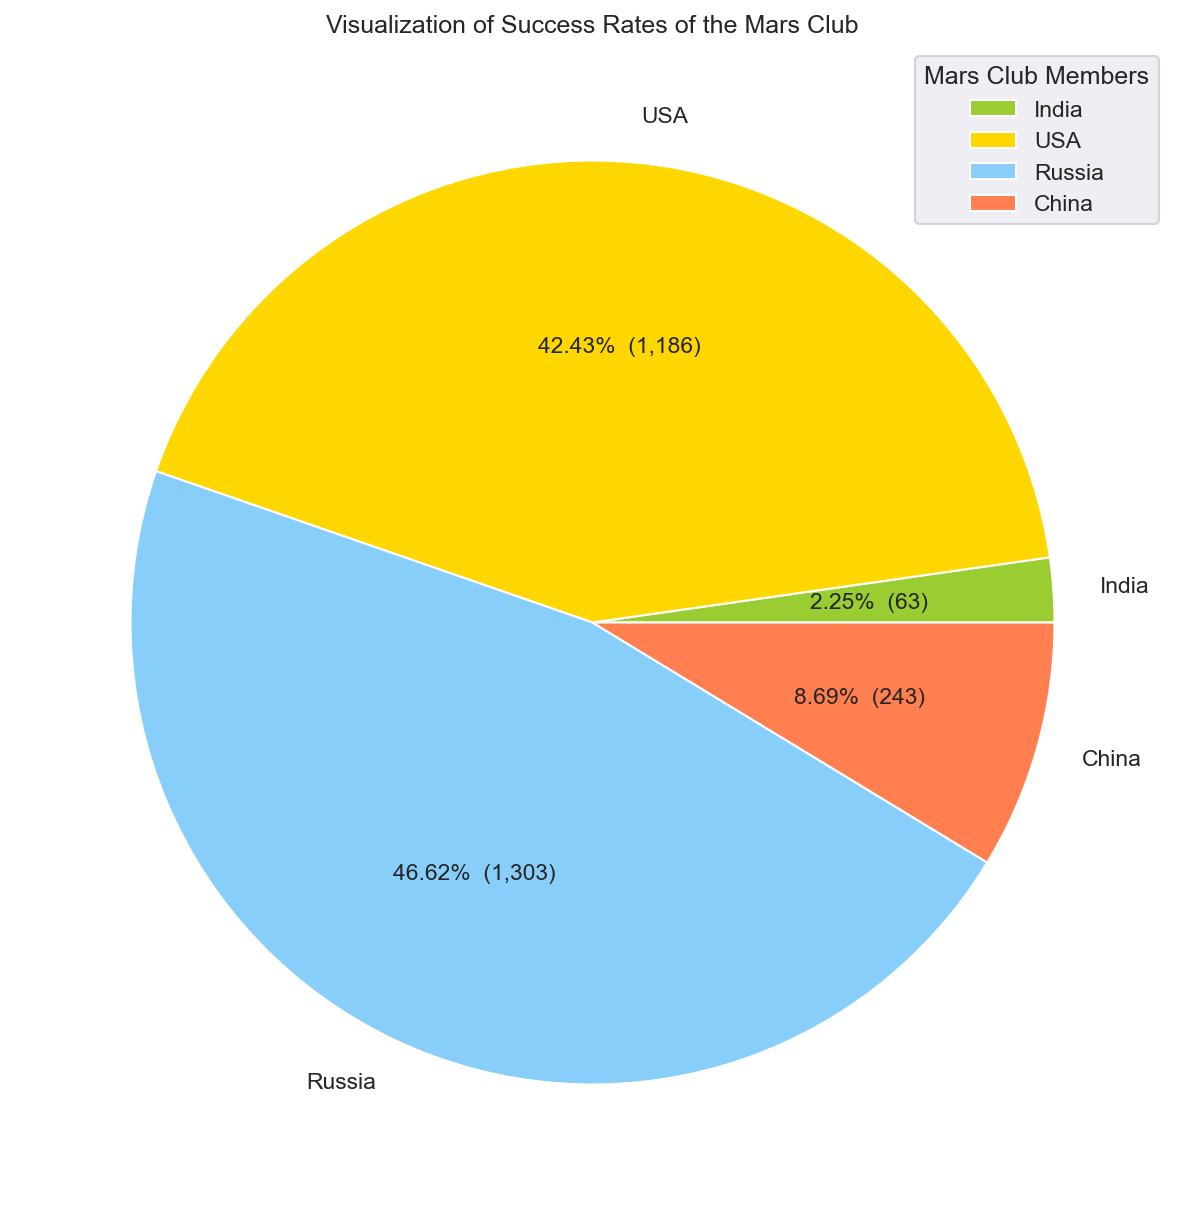

In [34]:
df_india = df[df["Country"] == "India"]
df_usa = df[df["Country"] == "USA"]
df_russia = df[df["Country"] == "Russia"]
df_china = df[df["Country"] == "China"]
india = (df_india["Status Mission"] == "Success").sum()
usa = (df_usa["Status Mission"] == "Success").sum()
russia = (df_russia["Status Mission"] == "Success").sum()
china = (df_china["Status Mission"] == "Success").sum()
plt.figure(figsize=(10, 10), dpi=150)
countries = [india, usa, russia, china]
Lab = ["India", "USA", "Russia", "China"]
colors = ["yellowgreen", "gold", "lightskyblue", "coral"]
plt.pie(
    countries,
    labels=Lab,
    autopct=lambda p: "{:.2f}%  ({:,.0f})".format(p, p * sum(countries) / 100),
    colors=colors,
    textprops={"fontsize": 11},
)
plt.legend(Lab, loc="best", title="Mars Club Members")
plt.title("Visualization of Success Rates of the Mars Club")
plt.savefig(
    "../images/visualization_of_success_rates_of_the_mars_club.png", bbox_inches="tight"
)

## Visualisation of active and retired missions of companies in last 20 years


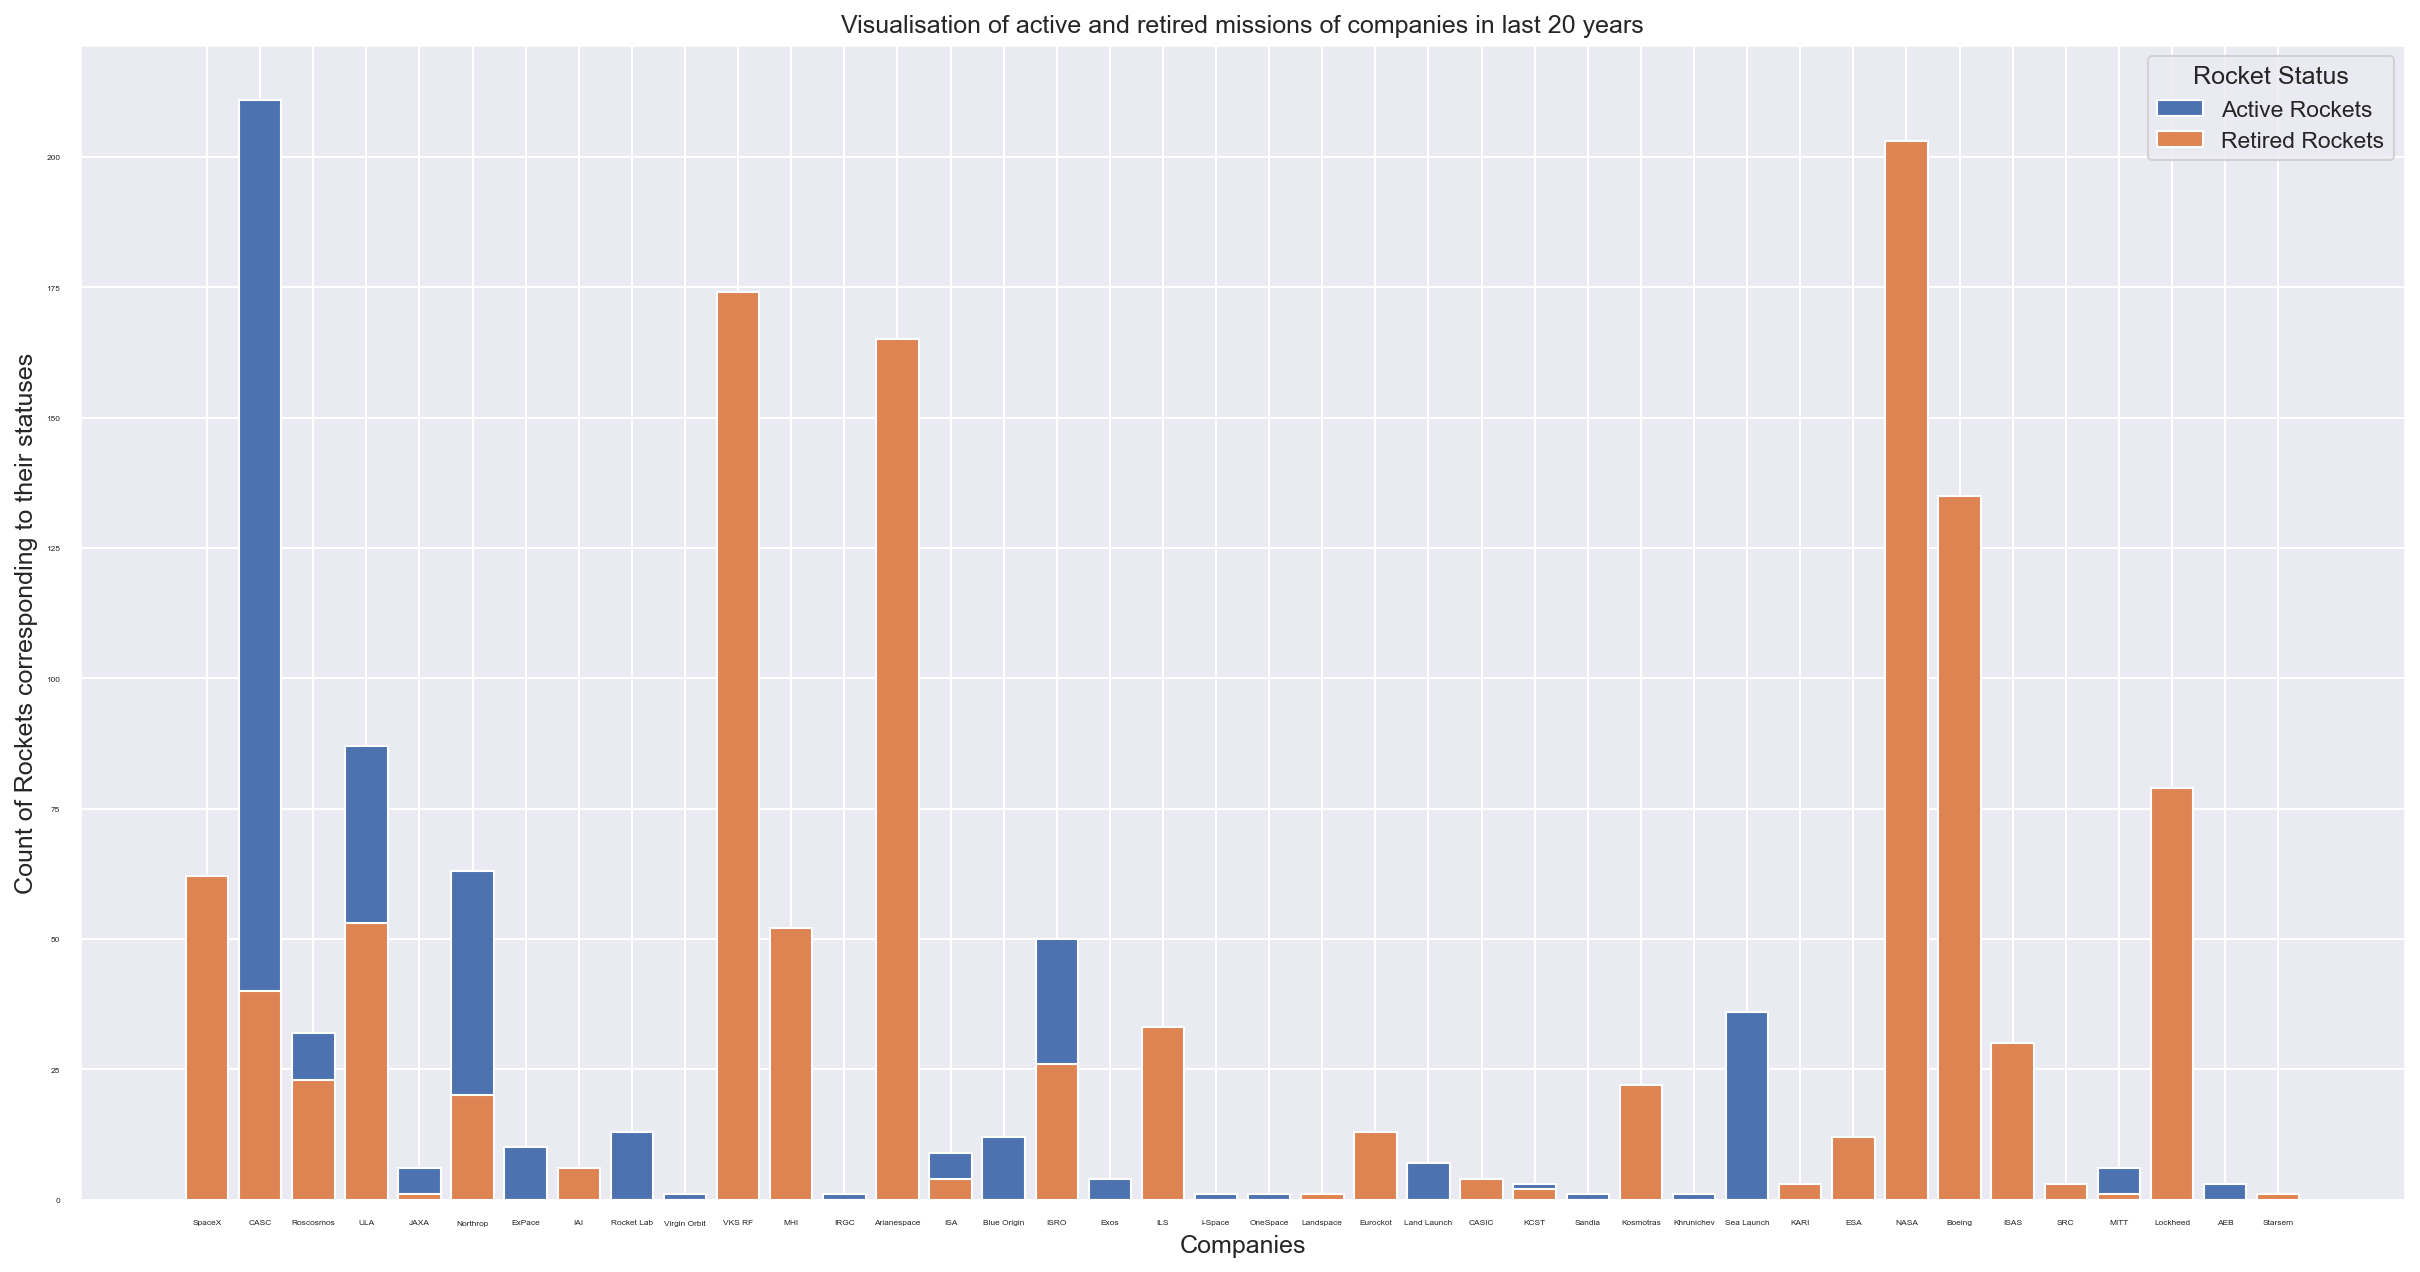

In [35]:
df_year = df[df["Year"] >= 2000]
companies = list(df_year["Company Name"].unique())
active = []
retired = []
for i in companies:
    df_company = df[df["Company Name"] == i]
    df_year_active = (df_company["Status Rocket"] == "StatusActive").sum()
    active.append(df_year_active)
    df_year_retired = (df_company["Status Rocket"] == "StatusRetired").sum()
    retired.append(df_year_retired)
plt.figure(figsize=(20, 10), dpi=150)
plt.bar(companies, active, label="Active Rockets")
plt.bar(companies, retired, label="Retired Rockets")
plt.xlabel("Companies")
plt.ylabel("Count of Rockets corresponding to their statuses")
plt.title("Visualisation of active and retired missions of companies in last 20 years")
plt.legend(loc="best", title="Rocket Status")
plt.savefig(
    "../images/visualisation_of_active_and_retired_missions_of_companies_in_last_20_years.png",
    bbox_inches="tight",
)